In [1]:
#IMPORT ALL NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
#STEP-1: COLLECTING DATA
df=pd.read_csv("C:\\Users\\trigo\\OneDrive\\Documents\\PIPELINE_LOAN_DEFAULTER_PROJECT\\NOTEBOOK\\DATA\\Loan_Default.csv")
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [369]:
#SO THE DATASET HAS TOTAL OF 1,48,670 ROWS AND 34 COLUMNS. HERE TARGET/OUTPUT COLUMN IS "Status" AND
#REST OTHERS ARE INPUT/INDEPENDENT COLUMNS. HERE THE PROBLEM STATEMENT AND MAIN AIM IS-
#Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan.
#To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. 
#Here i have collected past data on the loan borrowers & would like to develop a strong ML Model to classify
#if any new borrower is likely to default or not.

In [3]:
#STEP-2: DATA PREPROCESSING
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [4]:
df.drop(["ID","year"],axis=1,inplace=True) #SINCE YEAR AND ID WONT BE  EFFECTIVE IN DETERMINING WHETHER 
#THEY ARE DEFAULT OR NOT, SO DROPPING THEM.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

In [373]:
#HERE WE CAN SEE THERE ARE NULL VALUES PRESENT IN COLUMNS LIKE "loan_limit","approv_in_adv","'loan_purpose','rate_of_interest',
#'Interest_rate_spread','Upfront_charges','term','Neg_ammortization','property_value','income',','LTV','dtir1'.
#THERE ARE TOTAL 11 NUMBERICAL COLUMNS, 21 CATEGORICAL COLUMNS.

In [6]:
df.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [375]:
#HERE WE CAN SEE "rate_of_interest","Interest_rate_spread","Upfront_charges","term","income","Credit_Score",'LTV'
#CONTAINS MIN OR MAX VALUES AWAY FROM MEAN SO THEY ARE SKEWED. SO WE WILL ANALYSE IT FURTHER AND THEN SCALE THEM
#TO HAVE EQUAL IMPACT.

In [7]:
df["Status"].unique()

array([1, 0])

In [8]:
df["Status"].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [9]:
#THE DATASET IS IMBALNCED, SO WE HAVE TO BE VERY CRUCIAL WITH THE INPUT COLUMNS. 

In [9]:
#ANALYSING COLUMNS
df["loan_limit"].unique()

array(['cf', nan, 'ncf'], dtype=object)

In [380]:
#cf-confirming loans:Refers to loans th- Refers to loans that exceed the conforming loan limits or don’t meet underwriting guidelines set by Fannie Mae/Freddie Mac.

#ncf-non-confirming-loan:-refers to loans that exceed the conforming loan limits or don’t meet underwriting guidelines 
#set by Fannie Mae/Freddie Mac.



In [10]:
df["loan_limit"].value_counts()

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64

In [11]:
148670-(135348+9978)#TOTAL NAN VALUES. LETS IMPUTE THEM WITH MODE AND SEE FURTHER ANALYSIS.

3344

In [12]:
#SO BASED ON THE ABOVE ANALYSIS AND DEFINATIONS OF "loan_limit",IF A LOAN IS CONFIRMED i.e"cf", THEN THE CASE OF DEFAULTER WILL
#COME BUT IF THE LOAN IS NOT CONFIRMED THEN THERE IS NO MEANING OF FINDING OUT WHETHER THE PERSON IS DEFAULTER OR NOT. SO WE WILL DROP THIS.
df.drop(["loan_limit"],axis=1,inplace=True)

In [13]:
df["Gender"].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [14]:
df["Gender"].value_counts()

Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64

In [386]:
#AS 37% OF THE ENTIRE SAMPLES SHOWS THAT SEX IS NOT AVAILABLE, THEN LETS DROP THIS COLUMN FROM FURTHER ANALYSIS AS
#KEEPING WOULD MAKE THE MODEL BIASED.

In [15]:
df.drop(["Gender"],axis=1,inplace=True)

In [16]:
df["approv_in_adv"].unique()

array(['nopre', 'pre', nan], dtype=object)

In [389]:
#pre-Pre-approved loan offer:Borrower may have received prior approval based on credit profile or eligibility
#nopre-No pre-approval was given:Borrower applied without a pre-screened offer.


In [390]:
#so from the above definations again we see that "approv_in_adv" column has no relation with finding the defaulter 
#whether he is approved before or after dosent makes sense in determining defaulter or not.

In [17]:
df.drop(["approv_in_adv"],axis=1,inplace=True)

In [18]:
df["loan_type"].unique()

array(['type1', 'type2', 'type3'], dtype=object)

In [393]:
#BASED ON THE UNIQUE VALUES, IT IS SHOWING AS "type" BUT THIS COULD HOLD DIFFERENT MEANING IN DIFFERENT
#CONTEXT AS NO SPECIFIC SHORT LOAN_TYPE CODES IS GIVEN LIKE IT WAS IN "approv_in_advance", SO WE WILL 
#DROP THIS COLUMN FROM FURTHER ANALYSIS.

In [19]:
df.drop(["loan_type"],axis=1,inplace=True)

In [20]:
df["loan_purpose"].unique()

array(['p1', 'p4', 'p3', 'p2', nan], dtype=object)

In [396]:
#SAME HERE DIFFERENT PURPOSES CAN BE THERE BUT WHAT EACH DENOTES IS DIFFICULT TO INTERPRET , SO WE WILL
#DROP.

In [21]:
df.drop(["loan_purpose"],axis=1,inplace=True)

In [22]:
df["Credit_Worthiness"].unique() # levels of data detail used in credit card transaction processing, 


array(['l1', 'l2'], dtype=object)

In [23]:
#l1- BASIC CREDIT CARD DETAILS.
#l2- l1 DATA + OTHER DATA.
#BUT HERE THE SAME ISSUE PERSISTS, BUT BASED ON THE DEFINATION
#AS IT IS IMPORTANT TO ANALYSE DEFAULTER OR NOT,SO LETS KKEP THIS AND ANALYSE WHETHER I AM ABLE TO PREDICT THE STATUS OR NOT.
df["Credit_Worthiness"].value_counts()

Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64

In [24]:
crosstab_result = pd.crosstab(df['Credit_Worthiness'], df['Status'])

print(crosstab_result)


Status                  0      1
Credit_Worthiness               
l1                 107715  34629
l2                   4316   2010


In [401]:
#AS GOOD AMOUNT OF DATA CONTRIBUTES TO BOTH AND HELP US DETERMINING Status so analyse more.

In [25]:
df["open_credit"].unique() #is a flexible financial arrangement that allows a borrower to access funds repeatedly up to a set limit. 

array(['nopc', 'opc'], dtype=object)

In [26]:
df["open_credit"].value_counts()

open_credit
nopc    148114
opc        556
Name: count, dtype: int64

In [27]:
crosstab_result = pd.crosstab(df['open_credit'], df['Status'])

print(crosstab_result)


Status            0      1
open_credit               
nopc         111573  36541
opc             458     98


In [405]:
#MOST OF THEM HAVE NO CREDIT FACILITY BUT STILL THEY ARE REPAYING THE LOANS ON TIME, AND SOME OF THEM ARE UNABLE
#INSPITE OF HAVING CREDIT FACILITY, SO THIS COLUMN WILL BE IMPORTANT.

In [28]:
df["business_or_commercial"].unique() # indicate whether a person or entity uses their credit for commercial purposes or not.

array(['nob/c', 'b/c'], dtype=object)

In [29]:
#BASED ON THE DEFINATION, FOR THE TIME BEING IT IS NOT IMPORTANT IN DETERMINING "Status" SO LETS DROP THIS.
df.drop(["business_or_commercial"],axis=1,inplace=True)

In [30]:
df["loan_amount"].unique()

array([ 116500,  206500,  406500,  456500,  696500,  706500,  346500,
        266500,  376500,  436500,  136500,  466500,  226500,   76500,
        356500,  156500,  586500,  306500,  316500,  336500,  426500,
        476500,  196500,  186500,  246500,  216500,  506500,  656500,
        256500,  396500,  166500,  236500,  866500,  416500,  386500,
        596500,  606500,   86500,  286500,  146500,  446500,  636500,
        486500,  326500,   56500,  906500,  496500,  106500,  126500,
        296500,  176500, 1376500,  566500,  686500,  556500,  676500,
        366500,  276500,  716500,   66500,  616500,   96500,  826500,
         26500,  666500,  546500,  986500,  526500, 1226500,  726500,
       1486500, 1416500,  536500,  796500,  516500,   46500,  876500,
        576500,  626500, 1506500,  886500,  816500,  646500,  776500,
        746500,  736500,  896500,  836500,  806500, 1386500,  976500,
        926500,  786500,  766500, 1176500, 2006500,  756500, 1136500,
        966500, 1356

In [409]:
#LOAN AMOUNT IS AN ESSENTIAL FACTOR IN DETERMINING THE DEFAULTERS. SO KEEPING THIS COLUMN.

In [31]:
df["rate_of_interest"].unique()#The annual interest rate charged on the loan.

array([  nan, 4.56 , 4.25 , 4.   , 3.99 , 4.5  , 4.125, 4.875, 3.49 ,
       4.375, 3.625, 3.175, 2.99 , 4.99 , 5.25 , 3.75 , 3.375, 3.25 ,
       2.75 , 3.875, 3.5  , 4.75 , 3.125, 5.19 , 4.49 , 2.875, 5.125,
       4.625, 3.7  , 5.   , 3.   , 5.375, 4.18 , 3.69 , 5.5  , 3.65 ,
       5.75 , 3.775, 3.56 , 5.625, 6.24 , 4.475, 3.4  , 2.925, 3.925,
       5.74 , 5.875, 3.45 , 4.275, 2.975, 3.725, 2.85 , 3.675, 3.55 ,
       3.93 , 2.375, 3.85 , 3.525, 2.725, 2.5  , 2.6  , 5.99 , 5.49 ,
       8.   , 3.025, 3.8  , 2.775, 3.05 , 3.325, 6.   , 3.825, 3.15 ,
       3.1  , 4.4  , 3.3  , 4.05 , 6.75 , 4.025, 3.475, 2.625, 3.225,
       3.575, 4.175, 3.9  , 2.95 , 3.075, 3.275, 7.   , 3.425, 5.69 ,
       5.3  , 3.2  , 3.6  , 2.65 , 3.35 , 7.75 , 4.225, 2.25 , 3.95 ,
       4.7  , 2.125, 2.8  , 0.   , 4.2  , 3.975, 4.075, 2.675, 7.375,
       4.44 , 4.865, 4.15 , 6.125, 4.1  , 6.375, 6.5  , 4.35 , 4.3  ,
       6.25 , 2.475, 4.425, 4.525, 7.5  , 4.55 , 4.95 , 4.82 , 6.875,
       4.325, 2.575,

In [32]:
df[df["rate_of_interest"].isna()]

,Credit_Worthiness,open_credit,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,l1,nopc,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,l1,nopc,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
10,l2,nopc,136500,NaN,NaN,NaN,300.0,neg_amm,not_int,not_lpsm,...,EXP,723,CIB,55-64,to_inst,81.250000,North,direct,1,44.0
12,l1,nopc,206500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,...,CRIF,884,EXP,65-74,to_inst,80.038760,North,direct,1,51.0
15,l1,nopc,76500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,...,EXP,685,CIB,45-54,not_inst,55.434783,North,direct,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148651,l1,nopc,446500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,...,EXP,897,EXP,45-54,to_inst,87.893701,North,direct,1,37.0
148652,l1,nopc,96500,NaN,NaN,NaN,180.0,not_neg,not_int,not_lpsm,...,EQUI,608,EXP,55-64,to_inst,NaN,North,direct,1,NaN
148658,l1,nopc,386500,NaN,NaN,NaN,360.0,not_neg,int_only,not_lpsm,...,EQUI,669,EXP,25-34,to_inst,NaN,south,direct,1,NaN
148661,l1,nopc,346500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,...,EXP,585,CIB,25-34,to_inst,96.787710,south,direct,1,NaN


In [412]:
#HERE 36,000 ROWS HAS NAN VALUES FOR INTEREST, SO LETS DROP THIS COLUMN AS THIS COUNT IS MUCH HIGHER.

In [34]:
df.drop(["rate_of_interest"],axis=1,inplace=True)

KeyError: "['rate_of_interest'] not found in axis"

In [ ]:
df["Interest_rate_spread"].unique()#The difference between the loan’s interest rate and a
#4benchmark rate (like the average prime rate or treasury yield).

array([    nan,  0.2   ,  0.681 , ..., -0.9199,  0.7874, -0.3247],
      shape=(22517,))

In [415]:
#FOR EX-If a loan is offered at 10% interest and the benchmark is 6%, the spread is +4%.
#When the spread is significantly positive, lenders are saying:
#“We need to charge more than usual for this borrower.”

#This usually happens when:
#- The borrower's credit score is low.
#- There's a lack of stable income or collateral.
#- The loan purpose is seen as high-risk.
#So, a high spread = borrower perceived as riskier.

#When the loan rate is lower than the benchmark, that’s a negative spread—which is rare but possible.
#This might mean:
# The loan is subsidized (e.g., a government program).
# The lender offers promotional or competitive rates to attract business.
# Borrower is low-risk and highly creditworthy, deserving better terms.

#
#
#

In [39]:
#df[df["Interest_rate_spread"].isna()]

In [417]:
    #HERE 36,000+ ROWS HAS NAN VALUES FOR INTEREST_RATE_SPREAD, SO LETS DROP THIS COLUMN AS THIS COUNT IS MUCH HIGHER.

In [40]:
#df.drop(["Interest_rate_spread"],axis=1,inplace=True)

In [42]:
df["Upfront_charges"].unique() #Initial fees paid by the borrower—could include processing fees, origination charges, or insurance premiums.

array([    nan,  595.  ,    0.  , ..., 3113.06, 1226.64, 4323.33],
      shape=(58272,))

In [41]:
df[df["Upfront_charges"].isna()]

,Credit_Worthiness,open_credit,loan_amount,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,l1,nopc,116500,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,l1,nopc,206500,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
3,l1,nopc,456500,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
10,l2,nopc,136500,NaN,300.0,neg_amm,not_int,not_lpsm,168000.0,sb,...,EXP,723,CIB,55-64,to_inst,81.250000,North,direct,1,44.0
12,l1,nopc,206500,NaN,360.0,not_neg,not_int,not_lpsm,258000.0,sb,...,CRIF,884,EXP,65-74,to_inst,80.038760,North,direct,1,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148651,l1,nopc,446500,NaN,360.0,not_neg,not_int,not_lpsm,508000.0,sb,...,EXP,897,EXP,45-54,to_inst,87.893701,North,direct,1,37.0
148652,l1,nopc,96500,NaN,180.0,not_neg,not_int,not_lpsm,NaN,sb,...,EQUI,608,EXP,55-64,to_inst,NaN,North,direct,1,NaN
148658,l1,nopc,386500,NaN,360.0,not_neg,int_only,not_lpsm,NaN,sb,...,EQUI,669,EXP,25-34,to_inst,NaN,south,direct,1,NaN
148661,l1,nopc,346500,NaN,360.0,not_neg,not_int,not_lpsm,358000.0,sb,...,EXP,585,CIB,25-34,to_inst,96.787710,south,direct,1,NaN


In [421]:
#HERE 39,000+ ROWS HAS NAN VALUES FOR INTEREST, SO LETS DROP THIS COLUMN AS THIS COUNT IS MUCH HIGHER.

In [43]:
df.drop(["Upfront_charges"],axis=1,inplace=True)

In [44]:
df.columns

Index(['Credit_Worthiness', 'open_credit', 'loan_amount', 'term',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'income', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV',
       'Region', 'Security_Type', 'Status', 'dtir1'],
      dtype='object')

In [45]:
df["term"].unique()#NO OF MONTHS FOR LOAN PAYMENT

array([360., 300., 180., 312., 144., 240., 348., 324., 120.,  96., 192.,
       156., 228., 336., 288., 108., 276.,  nan, 132., 216., 168., 204.,
       264., 252., 165., 280., 322.])

In [46]:
df["term"].value_counts()

term
360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: count, dtype: int64

In [47]:
df[df["term"].isna()]

,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
1187,l1,nopc,106500,NaN,neg_amm,not_int,not_lpsm,NaN,sb,pr,...,EQUI,824,EXP,65-74,to_inst,NaN,south,direct,1,NaN
2228,l1,nopc,206500,NaN,neg_amm,not_int,not_lpsm,438000.0,sb,pr,...,CIB,838,CIB,45-54,to_inst,47.146119,south,direct,0,25.0
4373,l1,nopc,126500,NaN,neg_amm,not_int,not_lpsm,218000.0,sb,pr,...,CIB,775,EXP,45-54,to_inst,58.027523,south,direct,0,44.0
4630,l1,nopc,476500,NaN,neg_amm,not_int,not_lpsm,508000.0,sb,pr,...,CRIF,721,EXP,55-64,to_inst,93.799213,North,direct,1,55.0
6087,l1,nopc,206500,NaN,neg_amm,not_int,not_lpsm,NaN,sb,pr,...,EQUI,889,EXP,55-64,to_inst,NaN,North,direct,1,NaN
15166,l1,nopc,446500,NaN,neg_amm,not_int,not_lpsm,1158000.0,sb,pr,...,CIB,825,EXP,65-74,to_inst,38.557858,south,direct,0,44.0
17247,l1,nopc,276500,NaN,neg_amm,not_int,not_lpsm,NaN,sb,pr,...,EQUI,738,EXP,55-64,to_inst,NaN,North,direct,1,NaN
18443,l2,nopc,216500,NaN,neg_amm,not_int,not_lpsm,NaN,sb,sr,...,EQUI,623,EXP,65-74,to_inst,NaN,south,direct,1,NaN
19104,l1,nopc,216500,NaN,neg_amm,not_int,not_lpsm,338000.0,sb,pr,...,CIB,521,CIB,45-54,to_inst,64.053254,south,direct,0,20.0
28177,l1,nopc,146500,NaN,neg_amm,not_int,not_lpsm,NaN,sb,pr,...,EQUI,563,EXP,35-44,to_inst,NaN,North,direct,1,NaN


In [427]:
#AS ONLY 41 ROWS HAS NAN VALUES LETS IMPUTE IT RATHER THAN DROPPING BECAUSE THE DATASET IS HIGHLY IMLABALNCE.

In [48]:
crosstab_result = pd.crosstab(df['term'], df['Status'])

print(crosstab_result)

Status      0      1
term                
96.0      154     40
108.0      28      5
120.0     417     93
132.0      67     26
144.0     217     46
156.0     141     33
165.0       0      1
168.0      64     18
180.0    9827   3154
192.0      15      2
204.0      43     16
216.0      89     26
228.0      56     18
240.0    4639   1220
252.0       8      0
264.0      36      7
276.0      73     27
280.0       0      1
288.0      77     13
300.0    1226   1596
312.0     155     30
322.0       1      0
324.0    2063    703
336.0     174     39
348.0     207     53
360.0   92228  29457


In [49]:
# Rows where 'term' is null and status is 0
count_status_0 = df[df["term"].isna() & (df["Status"] == 0)].shape[0]

# Rows where 'term' is null and status is 1
count_status_1 = df[df["term"].isna() & (df["Status"] == 1)].shape[0]

print("Count where term is null and status is 0:", count_status_0)
print("Count where term is null and status is 1:", count_status_1)

Count where term is null and status is 0: 26
Count where term is null and status is 1: 15


In [430]:
#HERE IF I IMPUTE THE MISSING VALUES WITH MOST OCCURING 

In [50]:
# Step 1: Calculate the mean (excluding NaNs by default)
mean_term = df["term"].mean()

# Step 2: Fill NaNs with that mean value
df["term"].fillna(mean_term, inplace=True)

C:\Users\trigo\AppData\Local\Temp\ipykernel_11376\3644045383.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["term"].fillna(mean_term, inplace=True)


In [51]:
df["term"].unique()

array([360.        , 300.        , 180.        , 312.        ,
       144.        , 240.        , 348.        , 324.        ,
       120.        ,  96.        , 192.        , 156.        ,
       228.        , 336.        , 288.        , 108.        ,
       276.        , 335.13658169, 132.        , 216.        ,
       168.        , 204.        , 264.        , 252.        ,
       165.        , 280.        , 322.        ])

In [433]:
#WE SEE A DECIMAL VALUE MONTH, LETS ROUND IT OFF SO THAT IT DOES NOT CREATE PROBLEM FURTHER BY PRESERVING THE 
#MEANING.


In [52]:
df["term"] = df["term"].fillna(round(df["term"].mean())).astype(int)

In [53]:
df["term"].unique()

array([360, 300, 180, 312, 144, 240, 348, 324, 120,  96, 192, 156, 228,
       336, 288, 108, 276, 335, 132, 216, 168, 204, 264, 252, 165, 280,
       322])

In [54]:
crosstab_result = pd.crosstab(df['term'], df['Status'])

print(crosstab_result)

Status      0      1
term                
96        154     40
108        28      5
120       417     93
132        67     26
144       217     46
156       141     33
165         0      1
168        64     18
180      9827   3154
192        15      2
204        43     16
216        89     26
228        56     18
240      4639   1220
252         8      0
264        36      7
276        73     27
280         0      1
288        77     13
300      1226   1596
312       155     30
322         1      0
324      2063    703
335        26     15
336       174     39
348       207     53
360     92228  29457


In [55]:
df["Neg_ammortization"].unique()

array(['not_neg', 'neg_amm', nan], dtype=object)

In [438]:
# Negative amortization is present for that loan.
#'none' → No negative amortization; the loan follows standard repayment.
#Negative amortization can be a red flag:
#- It often signals payment deferral or borrower distress.
#- The loan balance grows over time, increasing repayment burden.
#- It’s common in adjustable-rate mortgages or student loans with deferred interest.


In [56]:
df[df["Neg_ammortization"].isna()]

,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
2458,l1,nopc,246500,360,NaN,not_int,not_lpsm,248000.0,sb,pr,...,CRIF,790,CIB,55-64,to_inst,99.395161,central,direct,0,47.0
4691,l1,nopc,96500,360,NaN,not_int,not_lpsm,118000.0,sb,pr,...,CRIF,826,CIB,25-34,to_inst,81.779661,south,direct,0,49.0
5845,l1,nopc,356500,360,NaN,not_int,not_lpsm,488000.0,sb,pr,...,CRIF,510,EXP,55-64,to_inst,73.053279,south,direct,0,41.0
7452,l1,nopc,456500,360,NaN,not_int,not_lpsm,768000.0,sb,pr,...,CIB,896,CIB,65-74,to_inst,59.440104,south,direct,0,49.0
8219,l1,nopc,556500,360,NaN,not_int,not_lpsm,1208000.0,sb,pr,...,CIB,757,EXP,65-74,to_inst,46.067881,central,direct,0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143376,l1,nopc,186500,360,NaN,not_int,not_lpsm,288000.0,sb,ir,...,CIB,623,CIB,55-64,to_inst,64.756944,south,direct,1,40.0
143780,l1,nopc,416500,360,NaN,not_int,not_lpsm,498000.0,sb,pr,...,CRIF,811,EXP,45-54,to_inst,83.634538,south,direct,0,36.0
145279,l1,nopc,106500,180,NaN,not_int,not_lpsm,NaN,sb,pr,...,EQUI,781,EXP,65-74,to_inst,NaN,central,direct,1,NaN
146531,l1,nopc,226500,360,NaN,not_int,not_lpsm,268000.0,sb,pr,...,CIB,651,CIB,35-44,to_inst,84.514925,south,direct,0,54.0


In [57]:
#121 ROWS ARE NA, LETS IMPUTE WITH MODE.
# Step 1: Calculate the mode of the column
mode_value = df["Neg_ammortization"].mode()[0]

# Step 2: Fill missing values with that mode
df["Neg_ammortization"].fillna(mode_value, inplace=True)

C:\Users\trigo\AppData\Local\Temp\ipykernel_11376\700880492.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Neg_ammortization"].fillna(mode_value, inplace=True)


In [58]:
df["Neg_ammortization"].unique()

array(['not_neg', 'neg_amm'], dtype=object)

In [59]:
df["Neg_ammortization"].value_counts()

Neg_ammortization
not_neg    133541
neg_amm     15129
Name: count, dtype: int64

In [60]:
crosstab_result = pd.crosstab(df['Neg_ammortization'], df['Status'])

print(crosstab_result)


Status                  0      1
Neg_ammortization               
neg_amm              8382   6747
not_neg            103649  29892


In [444]:
#AS FEW OF THEM HAVE neg_amm IN THEM SO IT COULD BE POTENTIAL IN DETERMINING OR CATCHING THE DEFAULTERS. SO 
#KEEPUNG THIS COLUMN.

In [61]:
df["interest_only"].unique()

array(['not_int', 'int_only'], dtype=object)

In [446]:
#- The loan has an interest-only period.
# 'none' → The loan follows a standard amortization, meaning payments include both interest and principal from the start.
#Interest-only loans can be riskier:
#- Borrowers may face a payment shock when the principal repayment kicks in.
#- They don’t build equity during the interest-only phase.
#- These loans are often used by borrowers with tight cash flow or speculative investment plans.


In [62]:
crosstab_result = pd.crosstab(df['interest_only'], df['Status'])

print(crosstab_result)


Status              0      1
interest_only               
int_only         5168   1942
not_int        106863  34697


In [448]:
## LESS PEOPLE HAVE STATUS AS DEFAULTERS i.e. 1 WITH INTEREST ONLY CATEGORY AND GOOD NUMBER OF PEOPLE
#HAVE STATUS AS DEFAULTERS WITH NOT ONLY INTEREST CATEGORY. SO KEEPING THIS COLUMN FOR ANALYSIS.

In [64]:
df.columns

Index(['Credit_Worthiness', 'open_credit', 'loan_amount', 'term',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'income', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV',
       'Region', 'Security_Type', 'Status', 'dtir1'],
      dtype='object')

In [65]:
df["lump_sum_payment"].unique() #a single, large payment made all at once instead of being 
#split into smaller installments over time.



array(['not_lpsm', 'lpsm'], dtype=object)

In [66]:
df["lump_sum_payment"].value_counts()

lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64

In [67]:
crosstab_result = pd.crosstab(df['lump_sum_payment'], df['Status'])

print(crosstab_result)

Status                 0      1
lump_sum_payment               
lpsm                 756   2628
not_lpsm          111275  34011


In [453]:
#lum_sum_payment based on the defination is important in determining whether the person is defaulter or not ,
#and based on above functionalities used and their results shows that it impacts the Status column. SO 
#KEEPING THIS COLUMN

In [68]:
df["property_value"].unique()

array([1.1800e+05,        nan, 5.0800e+05, 6.5800e+05, 7.5800e+05,
       1.0080e+06, 4.3800e+05, 3.0800e+05, 4.7800e+05, 6.8800e+05,
       1.6800e+05, 7.0800e+05, 2.5800e+05, 2.9800e+05, 1.3800e+05,
       3.6800e+05, 5.9800e+05, 7.4800e+05, 5.5800e+05, 1.9800e+05,
       4.4800e+05, 4.2800e+05, 5.6800e+05, 2.1800e+05, 4.6800e+05,
       2.2800e+05, 3.1800e+05, 3.3800e+05, 5.3800e+05, 4.0800e+05,
       1.0180e+06, 1.1080e+06, 4.1800e+05, 5.2800e+05, 2.4800e+05,
       1.5080e+06, 6.0800e+05, 6.6800e+05, 8.0800e+05, 9.4800e+05,
       1.2800e+05, 2.3800e+05, 7.1800e+05, 8.8800e+05, 1.4800e+05,
       6.2800e+05, 9.2800e+05, 2.0800e+05, 1.1980e+06, 1.8800e+05,
       5.8800e+05, 1.3080e+06, 6.7800e+05, 3.5800e+05, 2.8800e+05,
       2.0080e+06, 5.7800e+05, 3.4080e+06, 3.4800e+05, 8.8000e+04,
       4.9800e+05, 8.1800e+05, 7.6800e+05, 3.8800e+05, 6.1800e+05,
       8.9800e+05, 2.7800e+05, 9.7800e+05, 1.7080e+06, 8.5800e+05,
       4.5800e+05, 6.3800e+05, 1.2080e+06, 6.4800e+05, 9.0800e

In [69]:
df[df["property_value"].isna()]

,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
1,l1,nopc,206500,360,not_neg,not_int,lpsm,NaN,sb,pr,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
26,l1,nopc,476500,360,not_neg,not_int,not_lpsm,NaN,sb,pr,...,EQUI,518,EXP,45-54,to_inst,NaN,south,direct,1,NaN
42,l1,nopc,466500,360,not_neg,not_int,not_lpsm,NaN,sb,pr,...,EQUI,765,EXP,45-54,to_inst,NaN,North,direct,1,NaN
52,l1,nopc,136500,360,not_neg,not_int,not_lpsm,NaN,sb,pr,...,EQUI,555,EXP,65-74,to_inst,NaN,North,direct,1,NaN
53,l1,nopc,166500,360,not_neg,not_int,not_lpsm,NaN,sb,pr,...,EQUI,603,EXP,65-74,to_inst,NaN,North,direct,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148644,l1,nopc,276500,180,not_neg,not_int,not_lpsm,NaN,sb,pr,...,EQUI,846,EXP,>74,to_inst,NaN,south,direct,1,NaN
148649,l1,nopc,256500,240,not_neg,not_int,not_lpsm,NaN,sb,pr,...,EQUI,703,EXP,55-64,to_inst,NaN,south,direct,1,NaN
148652,l1,nopc,96500,180,not_neg,not_int,not_lpsm,NaN,sb,ir,...,EQUI,608,EXP,55-64,to_inst,NaN,North,direct,1,NaN
148658,l1,nopc,386500,360,not_neg,int_only,not_lpsm,NaN,sb,pr,...,EQUI,669,EXP,25-34,to_inst,NaN,south,direct,1,NaN


In [456]:
#15% OF THE SAMPLES CONTAINS NULL VALUES WHICH IS NOT VERY HIGH AND BASED ON THE DEFINATION, IT WILL
#IMPACT IN DETERMINING Status, SO LETS IMPUTE THE VALUES WITH MEAN AND LETS ANALYSE FURTHER

In [70]:
mean_term = df["property_value"].mean()

# Step 2: Fill NaNs with that mean value
df["property_value"].fillna(mean_term, inplace=True)

C:\Users\trigo\AppData\Local\Temp\ipykernel_11376\249193883.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["property_value"].fillna(mean_term, inplace=True)


In [71]:
df[df["property_value"].isna()]

,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1


In [72]:
df["construction_type"].unique() #different types of buildings or housing structures. 

array(['sb', 'mh'], dtype=object)

In [460]:
#sb=Stick-Built or Site-Built
#mh=Manufactured Home

In [461]:
#THIS COLUMN IS IRRELEVANT FOR DETERMINING THE Status of LOAN DEFAULTERS.

In [73]:
df.drop(["construction_type"],axis=1,inplace=True)

In [74]:
df["occupancy_type"].unique() #different types of property occupancy

array(['pr', 'sr', 'ir'], dtype=object)

In [464]:
#PR-- Primary Residence (pr): The property is the owner's main home.
#SR-- Secondary Residence (sr): A vacation home or second property not used as the main residence.
#IR-- Investment Residence (ir): A property owned for rental income or capital appreciation, not occupied by the owner.


In [465]:
#how the borrower is using the property they’re associated with


In [75]:
df["occupancy_type"].value_counts()

occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64

In [467]:
#THIS MIGHT BE AN IMPORTANT COLUMN FOR DETERMINING Status, SO KEEPING THIS COLUMN.

In [76]:
df["Secured_by"].unique() # type of collateral backing a loan or financial agreement.



array(['home', 'land'], dtype=object)

In [77]:
df["Secured_by"].value_counts()

Secured_by
home    148637
land        33
Name: count, dtype: int64

In [470]:
#| home | The loan is secured by a residential property (e.g., a house or flat). If the borrower defaults, the lender may claim the home. | 
#| land | The loan is secured by a plot of land (undeveloped or agricultural). The land serves as collateral in case of non-payment. | 


In [471]:
#AS ONLY JUST FEW DEFAULTERS ARE SECURED_BY "LAND" SO WE WILL DROP THIS COLUMN AS IT WILL MAKE THE IMPACT HIGHLY BIASED.

In [78]:
df.drop(["Secured_by"],axis=1,inplace=True)

In [79]:
df.columns

Index(['Credit_Worthiness', 'open_credit', 'loan_amount', 'term',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'occupancy_type', 'total_units', 'income',
       'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

In [80]:
df["total_units"].unique() #to the number of housing units associated with a property or loan.


array(['1U', '2U', '3U', '4U'], dtype=object)

In [475]:
#These codes are commonly used in real estate and mortgage datasets
#to indicate how many separate living spaces exist on a property.

In [476]:
#THIS MIGHT NOT BE SO RELEVANT IN DETERMINING Status, SO LETS DROP THIS FOR THE TIME BEING.

In [81]:
df.drop(["total_units"],axis=1,inplace=True)

In [82]:
df["income"].unique() 

array([ 1740.,  4980.,  9480., ..., 72060., 78720., 79920.], shape=(1002,))

In [479]:
#THIS COLUMN IS DEFINATELY IMPORTANT FOR FURTHER ANALYSIS. SO LETS ANALYSE IT FURTHER.

In [83]:
df[df["income"].isna()]

,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
13,l1,nopc,436500,360,not_neg,not_int,not_lpsm,508000.0,pr,NaN,CRIF,520,EXP,55-64,to_inst,85.925197,North,direct,0,NaN
31,l1,nopc,216500,360,not_neg,not_int,not_lpsm,228000.0,pr,NaN,CIB,705,CIB,55-64,to_inst,94.956140,North,direct,0,NaN
48,l1,nopc,386500,360,not_neg,not_int,not_lpsm,428000.0,pr,NaN,CIB,798,CIB,45-54,not_inst,90.303738,south,direct,0,NaN
87,l1,nopc,246500,360,not_neg,not_int,not_lpsm,358000.0,pr,NaN,EXP,511,EXP,35-44,to_inst,68.854749,south,direct,0,NaN
96,l1,nopc,286500,360,not_neg,not_int,not_lpsm,258000.0,pr,NaN,EXP,872,CIB,65-74,to_inst,111.046512,south,direct,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148594,l1,nopc,516500,360,not_neg,not_int,not_lpsm,518000.0,pr,NaN,EXP,894,EXP,45-54,not_inst,99.710425,south,direct,0,NaN
148598,l2,nopc,566500,360,not_neg,not_int,not_lpsm,628000.0,pr,NaN,EXP,666,EXP,25-34,not_inst,90.207006,North,direct,0,NaN
148604,l1,nopc,216500,360,not_neg,not_int,not_lpsm,248000.0,pr,NaN,EXP,775,EXP,>74,to_inst,87.298387,south,direct,0,NaN
148646,l1,nopc,366500,360,not_neg,not_int,not_lpsm,448000.0,pr,NaN,CIB,641,CIB,25-34,not_inst,81.808036,south,direct,1,NaN


In [84]:
# For Status = 0
missing_income_0 = df[df["Status"] == 0]["income"].isna().sum()

# For Status = 1
missing_income_1 = df[df["Status"] == 1]["income"].isna().sum()

print("Missing income values for Status = 0:", missing_income_0)
print("Missing income values for Status = 1:", missing_income_1)

Missing income values for Status = 0: 7911
Missing income values for Status = 1: 1239


In [482]:
#SO LETS Impute THIS COLUMN WITH MEAN

In [85]:
# Calculate mean of the 'income' column, excluding nulls
income_mean = df['income'].mean()

# Fill missing values with the mean
df['income'] = df['income'].fillna(income_mean)

In [87]:
df

,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,l1,nopc,116500,360,not_neg,not_int,not_lpsm,118000.000000,pr,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,l1,nopc,206500,360,not_neg,not_int,lpsm,497893.465696,pr,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,l1,nopc,406500,360,neg_amm,not_int,not_lpsm,508000.000000,pr,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,l1,nopc,456500,360,not_neg,not_int,not_lpsm,658000.000000,pr,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,l1,nopc,696500,360,not_neg,not_int,not_lpsm,758000.000000,pr,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,l1,nopc,436500,180,not_neg,not_int,not_lpsm,608000.000000,pr,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,l1,nopc,586500,360,not_neg,not_int,not_lpsm,788000.000000,ir,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,l1,nopc,446500,180,not_neg,not_int,not_lpsm,728000.000000,pr,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,l1,nopc,196500,180,not_neg,not_int,not_lpsm,278000.000000,pr,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [88]:
df[df["income"].isna()]

,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1


In [89]:
df["Status"].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [90]:
df["credit_type"].unique() # which refer to different credit bureaus that provide credit reports and scores in India.


array(['EXP', 'EQUI', 'CRIF', 'CIB'], dtype=object)

In [488]:
#EXP=Experian:A global credit bureau offering credit scores and reports for individuals and businesses.
#EQUI=Equifax:Known for strong fraud detection and risk analytics in credit reporting.
#CRIF=CRIF High Mark:Specializes in microfinance and rural lending data; widely used by NBFCs.
#CIB=CIBIL (TransUnion CIBIL):India’s oldest and most widely used credit bureau; trusted by major banks.

In [91]:
df["credit_type"].value_counts()

credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64

In [92]:
crosstab_result = pd.crosstab(df['credit_type'], df['Status'])

print(crosstab_result)

Status           0      1
credit_type              
CIB          40542   7610
CRIF         36774   7127
EQUI             1  15297
EXP          34714   6605


In [491]:
#CREDIT_TYPE IS IMPORTANT IN DETERMINING DEFAULTERS, SO LETS KEEP THIS COLUMN AND ANALYSE THEM FURTHER.

In [93]:
df["Credit_Score"].unique() # three-digit number that reflects how trustworthy someone is when it comes to
#borrowing money and repaying it.

array([758, 552, 834, 587, 602, 864, 860, 863, 580, 788, 723, 501, 884,
       520, 773, 685, 846, 534, 629, 688, 668, 692, 620, 533, 518, 812,
       647, 683, 705, 701, 591, 889, 651, 716, 780, 799, 766, 868, 765,
       673, 876, 886, 772, 640, 798, 858, 543, 555, 603, 808, 519, 786,
       769, 556, 567, 632, 818, 584, 750, 838, 741, 820, 665, 783, 663,
       612, 739, 571, 870, 793, 804, 801, 711, 634, 764, 865, 593, 511,
       677, 774, 638, 644, 732, 586, 642, 872, 898, 734, 639, 506, 664,
       670, 577, 857, 653, 595, 787, 560, 613, 514, 867, 717, 619, 600,
       524, 883, 503, 887, 604, 648, 797, 806, 845, 815, 585, 729, 538,
       791, 671, 572, 755, 760, 578, 836, 900, 777, 667, 880, 568, 805,
       590, 892, 540, 869, 737, 831, 608, 803, 795, 674, 781, 545, 796,
       660, 850, 851, 794, 866, 611, 621, 862, 829, 848, 775, 733, 700,
       633, 702, 882, 686, 652, 844, 649, 557, 761, 569, 523, 740, 690,
       616, 782, 601, 809, 855, 768, 627, 854, 762, 746, 592, 70

In [94]:
df['Credit_Score'].describe()

count    148670.000000
mean        699.789103
std         115.875857
min         500.000000
25%         599.000000
50%         699.000000
75%         800.000000
max         900.000000
Name: Credit_Score, dtype: float64

In [494]:
#800-900=Very low risk for lenders
#750-799=ikely to get favorable loan terms
#650-749=May get approved, but with higher rates
#300-649=Risky borrower; may face rejections

In [495]:
#SO AGAIN THIS COLUMN IS AN IMPORTANT ONE FOR DETERMINING THE DEFAULTERS.

In [95]:
crosstab_result = pd.crosstab(df['Credit_Score'], df['Status'])

print(crosstab_result)

Status          0    1
Credit_Score          
500           256  101
501           257  100
502           263   83
503           304   79
504           297   95
...           ...  ...
896           296   95
897           292   91
898           282   88
899           249  103
900           280  113

[401 rows x 2 columns]


In [96]:
df['co-applicant_credit_type'].unique() #IT IS SAME AS CREDIT_WORTHINESS, SO DROPPING THIS COLUMN.

array(['CIB', 'EXP'], dtype=object)

In [97]:
df.drop(["co-applicant_credit_type"],axis=1,inplace=True)

In [98]:
df['age'].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25', nan],
      dtype=object)

In [99]:
df[df["age"].isna()]

,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
266,l1,nopc,196500,324,neg_amm,not_int,not_lpsm,198000.0,pr,6957.338876,EQUI,768,NaN,NaN,99.242424,south,direct,1,NaN
706,l1,nopc,126500,324,neg_amm,not_int,not_lpsm,168000.0,pr,6957.338876,EQUI,845,NaN,NaN,75.297619,south,direct,1,NaN
1150,l1,nopc,176500,324,neg_amm,not_int,not_lpsm,218000.0,pr,6957.338876,EQUI,572,NaN,NaN,80.963303,south,direct,1,NaN
1219,l1,nopc,346500,324,neg_amm,not_int,not_lpsm,418000.0,pr,6957.338876,EQUI,864,NaN,NaN,82.894737,south,direct,1,NaN
3533,l1,nopc,146500,324,neg_amm,not_int,not_lpsm,178000.0,pr,6957.338876,EQUI,540,NaN,NaN,82.303371,south,direct,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145071,l1,nopc,156500,324,neg_amm,not_int,not_lpsm,188000.0,pr,6957.338876,EQUI,651,NaN,NaN,83.244681,south,direct,1,NaN
147037,l1,nopc,446500,324,neg_amm,not_int,not_lpsm,608000.0,pr,6957.338876,EQUI,591,NaN,NaN,73.437500,south,direct,1,NaN
147799,l1,nopc,206500,360,neg_amm,not_int,not_lpsm,228000.0,pr,6957.338876,EQUI,527,NaN,NaN,90.570175,south,direct,1,NaN
147974,l1,nopc,616500,360,neg_amm,not_int,not_lpsm,668000.0,pr,6957.338876,EQUI,604,NaN,NaN,92.290419,south,direct,1,NaN


In [501]:
#SINCE ONLY 200 ROWS ARE NULL VALUES ALSO AGE COLUMN IS NOT THAT IMPACTFUL IN DETERMINING Status SO DROPPING IT
#FOR THE TIME BEING

In [100]:
df.drop(["age"],axis=1,inplace=True)

In [101]:
df.columns

Index(['Credit_Worthiness', 'open_credit', 'loan_amount', 'term',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'occupancy_type', 'income', 'credit_type',
       'Credit_Score', 'submission_of_application', 'LTV', 'Region',
       'Security_Type', 'Status', 'dtir1'],
      dtype='object')

In [102]:
df[ 'submission_of_application'].unique() #indicate how or where the application was submitted.


array(['to_inst', 'not_inst', nan], dtype=object)

In [94]:
df[df["submission_of_application"].isna()]

,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
266,l1,nopc,b/c,196500,324,neg_amm,not_int,not_lpsm,198000.0,pr,6957.338876,EQUI,768,NaN,NaN,99.242424,south,direct,1,NaN
706,l1,nopc,nob/c,126500,324,neg_amm,not_int,not_lpsm,168000.0,pr,6957.338876,EQUI,845,NaN,NaN,75.297619,south,direct,1,NaN
1150,l1,nopc,b/c,176500,324,neg_amm,not_int,not_lpsm,218000.0,pr,6957.338876,EQUI,572,NaN,NaN,80.963303,south,direct,1,NaN
1219,l1,nopc,b/c,346500,324,neg_amm,not_int,not_lpsm,418000.0,pr,6957.338876,EQUI,864,NaN,NaN,82.894737,south,direct,1,NaN
3533,l1,nopc,b/c,146500,324,neg_amm,not_int,not_lpsm,178000.0,pr,6957.338876,EQUI,540,NaN,NaN,82.303371,south,direct,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145071,l1,nopc,b/c,156500,324,neg_amm,not_int,not_lpsm,188000.0,pr,6957.338876,EQUI,651,NaN,NaN,83.244681,south,direct,1,NaN
147037,l1,nopc,nob/c,446500,324,neg_amm,not_int,not_lpsm,608000.0,pr,6957.338876,EQUI,591,NaN,NaN,73.437500,south,direct,1,NaN
147799,l1,nopc,b/c,206500,360,neg_amm,not_int,not_lpsm,228000.0,pr,6957.338876,EQUI,527,NaN,NaN,90.570175,south,direct,1,NaN
147974,l1,nopc,b/c,616500,360,neg_amm,not_int,not_lpsm,668000.0,pr,6957.338876,EQUI,604,NaN,NaN,92.290419,south,direct,1,NaN


In [506]:
#SAME AS AGE COLUMN IT CONTAINS ONLY 200 NULL VALUES.
#DROPPING THIS COLUMN, AS IT IS IRRELEVANT IN DETERMINING Status.

In [103]:
df.drop(["submission_of_application"],axis=1,inplace=True)

In [104]:
df['LTV'].unique() #ratio of the loan amount to the appraised value of the asset 

array([ 98.72881356,          nan,  80.01968504, ..., 151.8145161 ,
        41.49550706,  32.80201342], shape=(8485,))

In [509]:
#LTV = (Loan Amount / Property Value) × 100
#<=80%=Easier approval
#80-90%=May need mortage insurance
#>90%=Higher interest, stricter scrutiny
#These could help you analyze how risky different loans are or how much equity borrowers are putting in.

In [105]:
df[df["LTV"].isna()]

,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,occupancy_type,income,credit_type,Credit_Score,LTV,Region,Security_Type,Status,dtir1
1,l1,nopc,206500,360,not_neg,not_int,lpsm,497893.465696,pr,4980.0,EQUI,552,NaN,North,direct,1,NaN
26,l1,nopc,476500,360,not_neg,not_int,not_lpsm,497893.465696,pr,6780.0,EQUI,518,NaN,south,direct,1,NaN
42,l1,nopc,466500,360,not_neg,not_int,not_lpsm,497893.465696,pr,0.0,EQUI,765,NaN,North,direct,1,NaN
52,l1,nopc,136500,360,not_neg,not_int,not_lpsm,497893.465696,pr,3360.0,EQUI,555,NaN,North,direct,1,NaN
53,l1,nopc,166500,360,not_neg,not_int,not_lpsm,497893.465696,pr,4560.0,EQUI,603,NaN,North,direct,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148644,l1,nopc,276500,180,not_neg,not_int,not_lpsm,497893.465696,pr,4140.0,EQUI,846,NaN,south,direct,1,NaN
148649,l1,nopc,256500,240,not_neg,not_int,not_lpsm,497893.465696,pr,8220.0,EQUI,703,NaN,south,direct,1,NaN
148652,l1,nopc,96500,180,not_neg,not_int,not_lpsm,497893.465696,ir,5460.0,EQUI,608,NaN,North,direct,1,NaN
148658,l1,nopc,386500,360,not_neg,int_only,not_lpsm,497893.465696,pr,4680.0,EQUI,669,NaN,south,direct,1,NaN


In [511]:
#AS 15000 OR MORE ROWS ARE NAN, SO LETS DROP THIS COLUMN FOR THE TIME BEING.

In [106]:
df.drop(["LTV"],axis=1,inplace=True)

In [107]:
df['Region'].unique()

array(['south', 'North', 'central', 'North-East'], dtype=object)

In [108]:
crosstab_result = pd.crosstab(df['Region'], df['Status'])

print(crosstab_result)

Status          0      1
Region                  
North       57901  16821
North-East    859    376
central      6302   2395
south       46969  17047


In [515]:
#THIS SHOWS THAT PEOPLE FROM SOUTH HAVE GREATER CHANCES OF DEFAULTERS AND PEOPLE FROM NORTH HAVE HIGHEST CHANCES 
#OF REPAYING. LETS KEEP THIS COLUMN FOR ANALYSIS.

In [109]:
df['Security_Type'].unique() #refer to the type of collateral or guarantee backing a loan or financial obligation.


array(['direct', 'Indriect'], dtype=object)

In [517]:
#| direct | Direct security means the loan is backed by a specific asset pledged by the borrower—like property, 
#cash, or equipment. If the borrower defaults, the lender can seize this asset. | 
#| indirect | Indirect security involves a third-party guarantee or letter of comfort.
#The asset isn’t directly pledged, but someone else (like a guarantor or parent company) promises to repay if the borrower defaults. | 


In [110]:
#FROM THE DEFINATION IT MEANS THAT AFTER DEFAULTER IS UNABLE TO REPAY LOANS SOMEONE WILL PAY, SO THIS
#IS NOT REQUIRED IN OUR ANALYSIS, SO LETS DROP THIS COLUMN.
df.drop(["Security_Type"],axis=1,inplace=True)

In [111]:
df["dtir1"].unique()

array([45., nan, 46., 42., 39., 40., 44., 30., 36., 51., 20., 31.,  6.,
       35., 34., 49., 37., 41., 38., 56., 23., 28., 11., 27., 55., 22.,
       24., 52., 33., 26., 47., 60., 25., 32., 10., 15., 53.,  7., 19.,
       48., 59., 57.,  9., 50., 21., 58., 29., 43., 17., 54., 13., 12.,
       16., 61., 18., 14.,  8.,  5.])

In [112]:
df[df["dtir1"].isna()]

,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,occupancy_type,income,credit_type,Credit_Score,Region,Status,dtir1
1,l1,nopc,206500,360,not_neg,not_int,lpsm,497893.465696,pr,4980.000000,EQUI,552,North,1,NaN
13,l1,nopc,436500,360,not_neg,not_int,not_lpsm,508000.000000,pr,6957.338876,CRIF,520,North,0,NaN
26,l1,nopc,476500,360,not_neg,not_int,not_lpsm,497893.465696,pr,6780.000000,EQUI,518,south,1,NaN
31,l1,nopc,216500,360,not_neg,not_int,not_lpsm,228000.000000,pr,6957.338876,CIB,705,North,0,NaN
42,l1,nopc,466500,360,not_neg,not_int,not_lpsm,497893.465696,pr,0.000000,EQUI,765,North,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,l1,nopc,256500,240,not_neg,not_int,not_lpsm,497893.465696,pr,8220.000000,EQUI,703,south,1,NaN
148652,l1,nopc,96500,180,not_neg,not_int,not_lpsm,497893.465696,ir,5460.000000,EQUI,608,North,1,NaN
148658,l1,nopc,386500,360,not_neg,int_only,not_lpsm,497893.465696,pr,4680.000000,EQUI,669,south,1,NaN
148661,l1,nopc,346500,360,not_neg,not_int,not_lpsm,358000.000000,pr,6957.338876,EXP,585,south,1,NaN


In [521]:
#AS 24000+ ROWS ARE NAN , SO DROPPING THIS COLUMN FROM FURTHER ANALYSIS, BECAUSE IMPUTING ,WILL MAKE IT BIASED.

In [113]:
df.drop(["dtir1"],axis=1,inplace=True)

In [114]:
df.columns.nunique()

14

In [115]:
#SO WE HAVE REACHED DOWN TO 17 IMPORTANT COLUMNS FOR DETERMINING Status of a borrower.
df.columns

Index(['Credit_Worthiness', 'open_credit', 'loan_amount', 'term',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'occupancy_type', 'income', 'credit_type',
       'Credit_Score', 'Region', 'Status'],
      dtype='object')

In [116]:
#CHCEKING FOR DUPLICACY
df.duplicated().sum()

np.int64(33)

In [117]:
df[df.duplicated()]




,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,occupancy_type,income,credit_type,Credit_Score,Region,Status
19081,l1,nopc,156500,360,not_neg,not_int,lpsm,158000.000000,pr,6957.338876,EXP,558,south,1
29553,l1,nopc,156500,360,not_neg,not_int,not_lpsm,158000.000000,pr,6957.338876,CRIF,607,south,0
29627,l1,nopc,526500,360,not_neg,not_int,not_lpsm,538000.000000,pr,6957.338876,EXP,590,North,0
44457,l1,nopc,296500,360,not_neg,not_int,not_lpsm,318000.000000,pr,6957.338876,CRIF,618,North,0
44624,l1,nopc,266500,360,not_neg,not_int,not_lpsm,308000.000000,pr,6957.338876,CIB,511,North,0
45904,l1,nopc,346500,360,not_neg,not_int,not_lpsm,348000.000000,pr,4800.000000,CIB,884,south,0
55661,l1,nopc,266500,360,not_neg,not_int,not_lpsm,278000.000000,pr,6957.338876,EXP,695,south,0
66546,l1,nopc,206500,360,not_neg,not_int,not_lpsm,258000.000000,pr,6957.338876,EXP,644,south,0
76502,l1,nopc,356500,360,not_neg,not_int,not_lpsm,497893.465696,pr,0.000000,EQUI,609,south,1
76887,l1,nopc,366500,360,not_neg,not_int,not_lpsm,688000.000000,pr,6957.338876,EXP,563,south,0


In [527]:
#ONLY FEW DUPLICATED ROWS ARE THERE BUT WE CANNOT DROP THEM AS BECAUSE SOME OF THE COLUMNS ARE CHANGING AND HAVE
#NO SAME VALUES i.e. "loan_amount","property_value" etc.

In [528]:
#ANALYSING BOXPLOTS FOR NUMERICAL COLUMNS

In [110]:
#STEP-3: EDA(EXPLORATORY DATA ANALYSIS)
cat_cols=df.select_dtypes(include="object")
cat_cols

,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,occupancy_type,credit_type,age,Region
0,l1,nopc,nob/c,not_neg,not_int,not_lpsm,pr,EXP,25-34,south
1,l1,nopc,b/c,not_neg,not_int,lpsm,pr,EQUI,55-64,North
2,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,pr,EXP,35-44,south
3,l1,nopc,nob/c,not_neg,not_int,not_lpsm,pr,EXP,45-54,North
4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,pr,CRIF,25-34,North
...,...,...,...,...,...,...,...,...,...,...
148665,l1,nopc,nob/c,not_neg,not_int,not_lpsm,pr,CIB,55-64,south
148666,l1,nopc,nob/c,not_neg,not_int,not_lpsm,ir,CIB,25-34,south
148667,l1,nopc,nob/c,not_neg,not_int,not_lpsm,pr,CIB,45-54,North
148668,l1,nopc,nob/c,not_neg,not_int,not_lpsm,pr,EXP,55-64,North


In [118]:
num_cols=df.select_dtypes(exclude="object")
num_cols

,loan_amount,term,property_value,income,Credit_Score,Status
0,116500,360,118000.000000,1740.0,758,1
1,206500,360,497893.465696,4980.0,552,1
2,406500,360,508000.000000,9480.0,834,0
3,456500,360,658000.000000,11880.0,587,0
4,696500,360,758000.000000,10440.0,602,0
...,...,...,...,...,...,...
148665,436500,180,608000.000000,7860.0,659,0
148666,586500,360,788000.000000,7140.0,569,0
148667,446500,180,728000.000000,6900.0,702,0
148668,196500,180,278000.000000,7140.0,737,0


In [121]:
cat_cols=df.select_dtypes(include="object")
cat_cols

,Credit_Worthiness,open_credit,Neg_ammortization,interest_only,lump_sum_payment,occupancy_type,credit_type,Region
0,l1,nopc,not_neg,not_int,not_lpsm,pr,EXP,south
1,l1,nopc,not_neg,not_int,lpsm,pr,EQUI,North
2,l1,nopc,neg_amm,not_int,not_lpsm,pr,EXP,south
3,l1,nopc,not_neg,not_int,not_lpsm,pr,EXP,North
4,l1,nopc,not_neg,not_int,not_lpsm,pr,CRIF,North
...,...,...,...,...,...,...,...,...
148665,l1,nopc,not_neg,not_int,not_lpsm,pr,CIB,south
148666,l1,nopc,not_neg,not_int,not_lpsm,ir,CIB,south
148667,l1,nopc,not_neg,not_int,not_lpsm,pr,CIB,North
148668,l1,nopc,not_neg,not_int,not_lpsm,pr,EXP,North


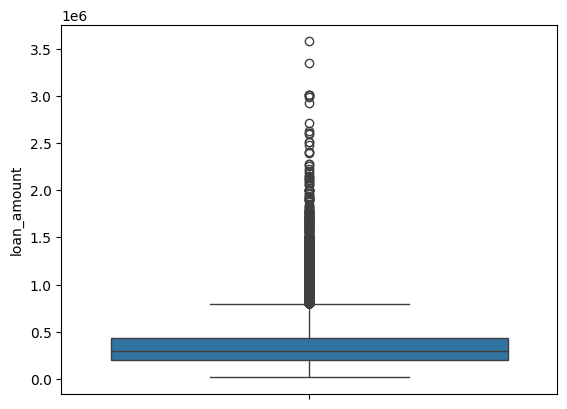

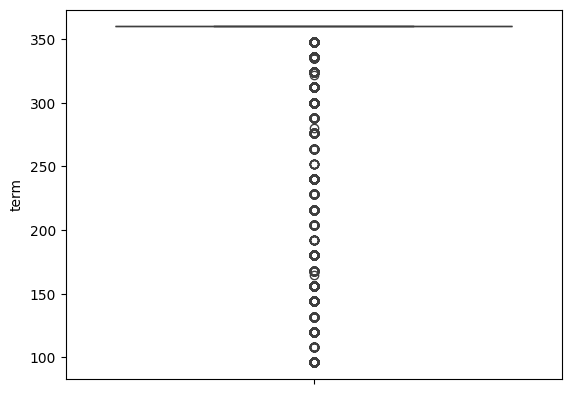

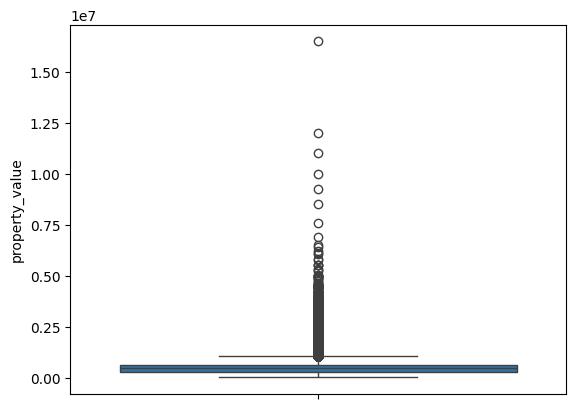

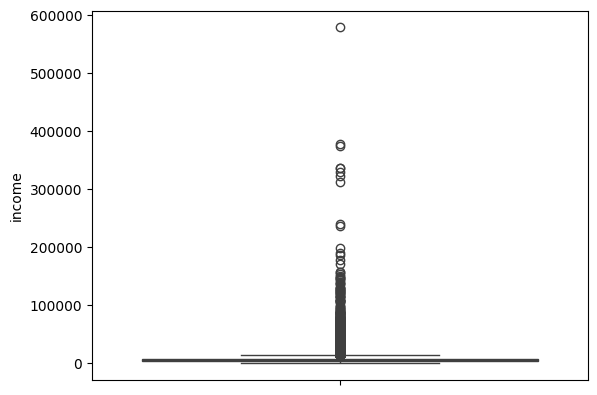

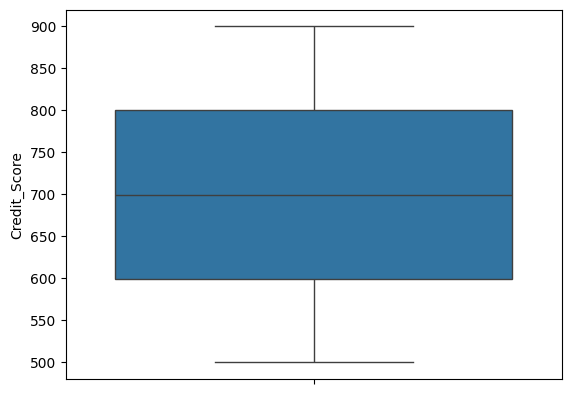

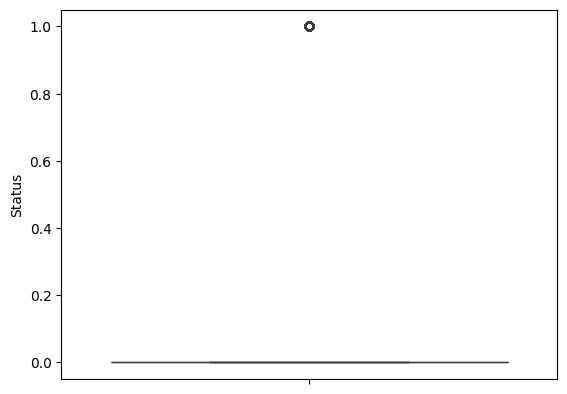

In [531]:
for cols in num_cols:
    sns.boxplot(df[cols])
    plt.show()

In [532]:
#FROM THE ABOVE BOXPLOT WE CAN SEE THAT, "loan_amount","property_value","income"
#COLUMN HAS SMALL NUMBER OF OUTLIERS SO WE WILL KEEP THEM INSTEAD OF REMOVING AS IT MIGHT LEAD TO LOSS OF INFORMATIONS.


In [119]:
cols1=["loan_amount","property_value","income"]
for col in cols1:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Column: {col}")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Original Min: {df[col].min():.2f}, Max: {df[col].max():.2f}")

    # Cap the outliers using .clip
    df[col] = df[col].clip(lower_bound, upper_bound)

    print(f"  Capped Min: {df[col].min():.2f}, Max: {df[col].max():.2f}\n")


Column: loan_amount
  Q1: 196500.00, Q3: 436500.00
  IQR: 240000.00
  Lower Bound: -163500.00
  Upper Bound: 796500.00
  Original Min: 16500.00, Max: 3576500.00
  Capped Min: 16500.00, Max: 796500.00

Column: property_value
  Q1: 288000.00, Q3: 598000.00
  IQR: 310000.00
  Lower Bound: -177000.00
  Upper Bound: 1063000.00
  Original Min: 8000.00, Max: 16508000.00
  Capped Min: 8000.00, Max: 1063000.00

Column: income
  Q1: 3840.00, Q3: 8280.00
  IQR: 4440.00
  Lower Bound: -2820.00
  Upper Bound: 14940.00
  Original Min: 0.00, Max: 578580.00
  Capped Min: 0.00, Max: 14940.00



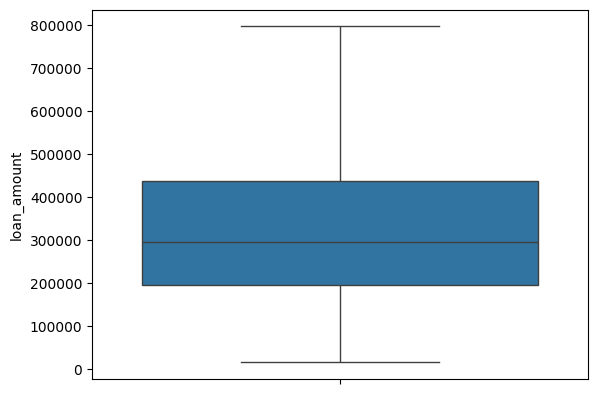

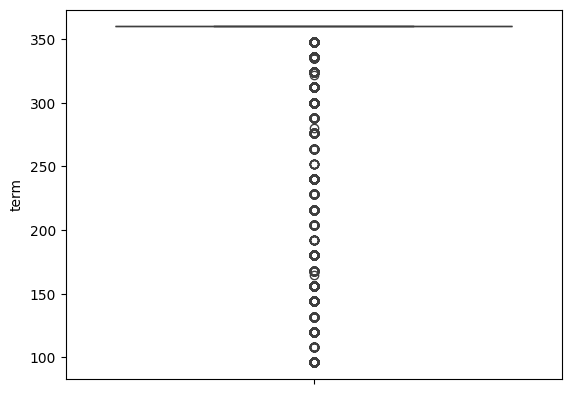

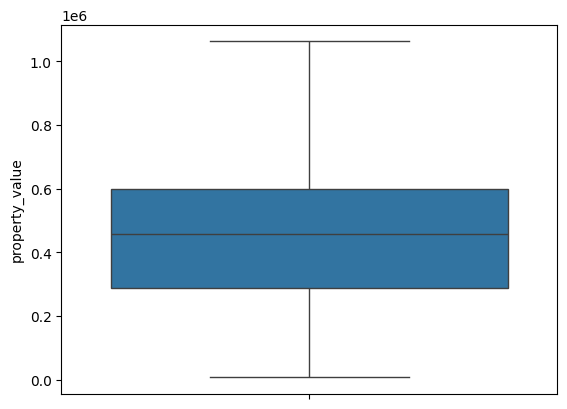

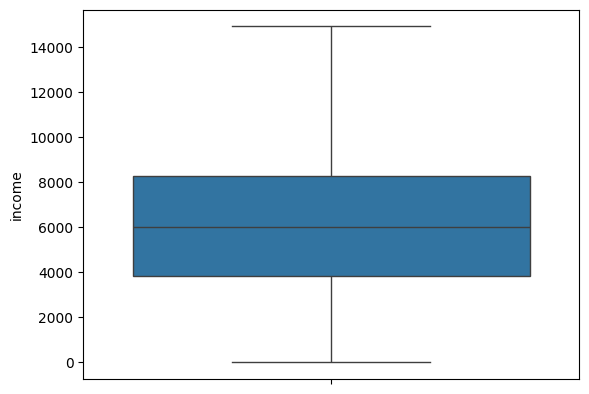

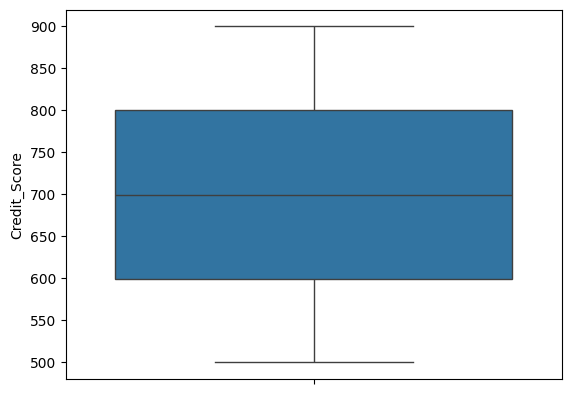

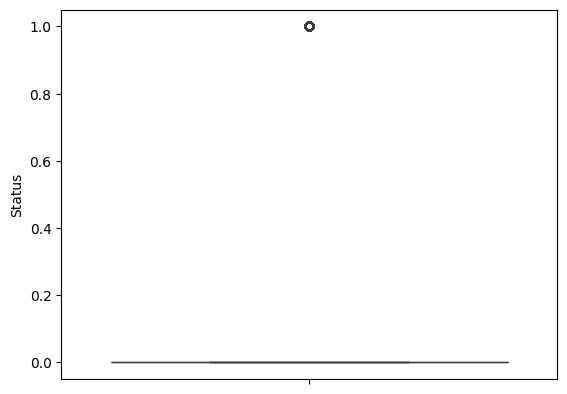

In [535]:
for cols in num_cols:
    sns.boxplot(df[cols])
    plt.show()

In [122]:
cat_cols

,Credit_Worthiness,open_credit,Neg_ammortization,interest_only,lump_sum_payment,occupancy_type,credit_type,Region
0,l1,nopc,not_neg,not_int,not_lpsm,pr,EXP,south
1,l1,nopc,not_neg,not_int,lpsm,pr,EQUI,North
2,l1,nopc,neg_amm,not_int,not_lpsm,pr,EXP,south
3,l1,nopc,not_neg,not_int,not_lpsm,pr,EXP,North
4,l1,nopc,not_neg,not_int,not_lpsm,pr,CRIF,North
...,...,...,...,...,...,...,...,...
148665,l1,nopc,not_neg,not_int,not_lpsm,pr,CIB,south
148666,l1,nopc,not_neg,not_int,not_lpsm,ir,CIB,south
148667,l1,nopc,not_neg,not_int,not_lpsm,pr,CIB,North
148668,l1,nopc,not_neg,not_int,not_lpsm,pr,EXP,North


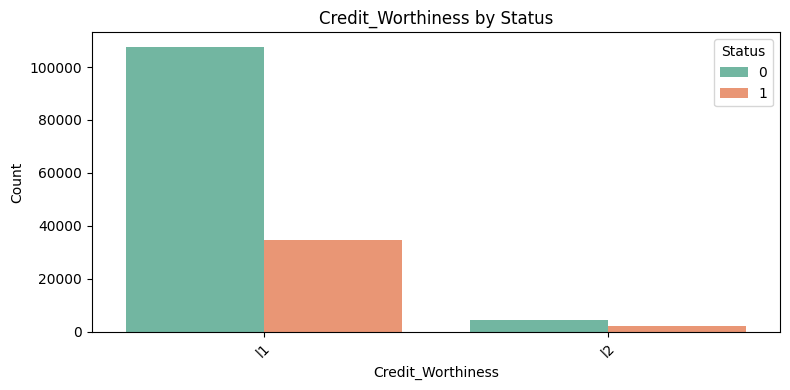

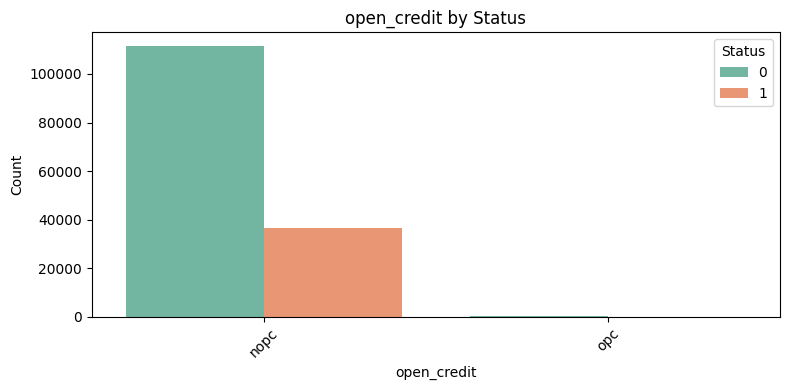

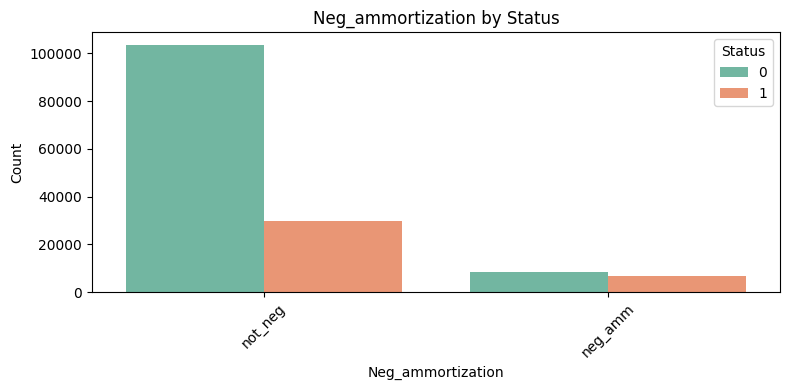

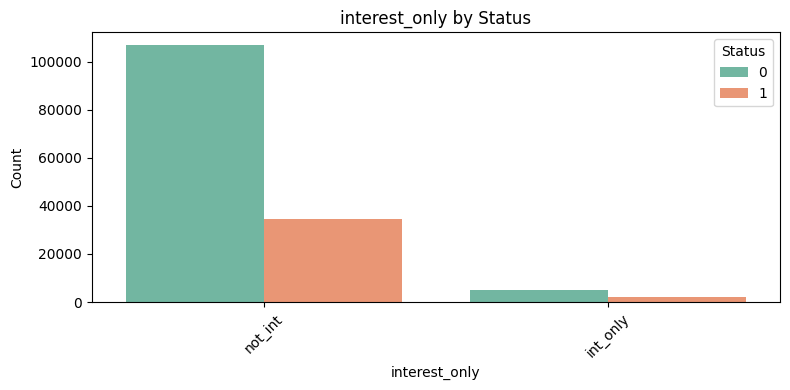

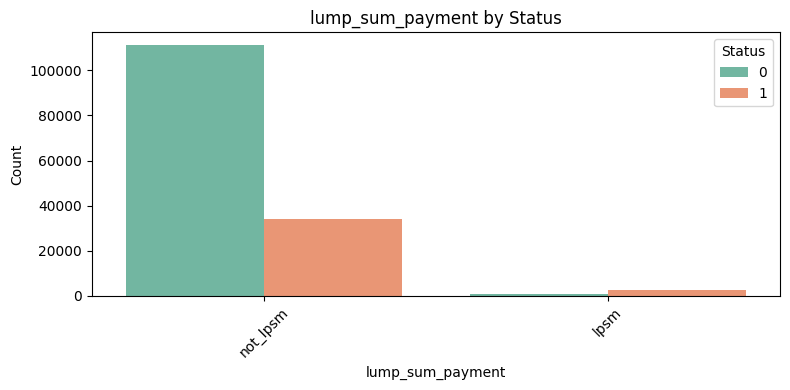

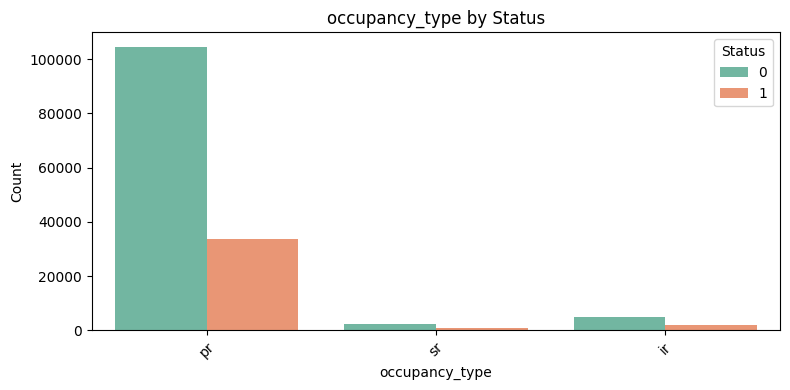

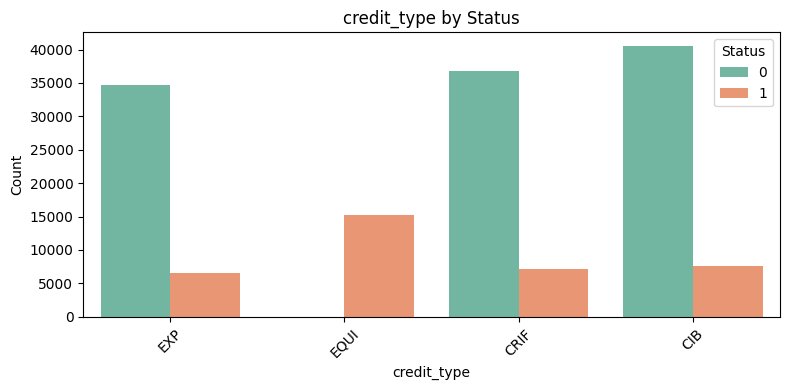

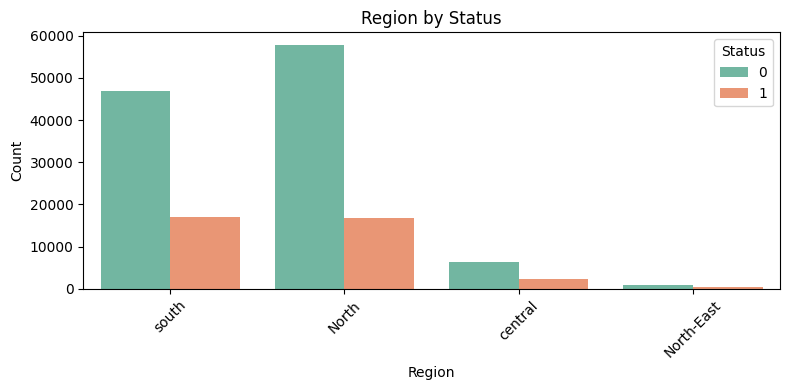

In [537]:
# PERFORMING VISUALISATION FOR BOTH KINDS OF COLS.
for cols in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=cols, hue='Status', palette='Set2')
    plt.title(f'{cols} by Status')
    plt.xticks(rotation=45)
    plt.xlabel(cols)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [ ]:

#FROM ABOVE VISUALISATIONS , WE CAN SEE -
#"open_credit"- with "opc" it is not at all affecting Status, so we will drop this column as again this would make it biased.

#"occupancy_type"="sr","ir" is affecting least, so we will drop this column.
#"region" with "north_east" is affecting least, so lets drop this column as only dropping rows with region="north-east", would make it
#biased for status=1


,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,income,credit_type,Credit_Score,Region,Status


In [123]:
df.drop(["open_credit","occupancy_type","Region"],axis=1,inplace=True)

In [124]:
df.columns

Index(['Credit_Worthiness', 'loan_amount', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value', 'income',
       'credit_type', 'Credit_Score', 'Status'],
      dtype='object')

In [127]:
#FOR NUMERICAL COLUMNS
num_cols=df.select_dtypes(exclude="object")
num_cols

,loan_amount,term,property_value,income,Credit_Score,Status
0,116500,360,118000.000000,1740.0,758,1
1,206500,360,497893.465696,4980.0,552,1
2,406500,360,508000.000000,9480.0,834,0
3,456500,360,658000.000000,11880.0,587,0
4,696500,360,758000.000000,10440.0,602,0
...,...,...,...,...,...,...
148665,436500,180,608000.000000,7860.0,659,0
148666,586500,360,788000.000000,7140.0,569,0
148667,446500,180,728000.000000,6900.0,702,0
148668,196500,180,278000.000000,7140.0,737,0


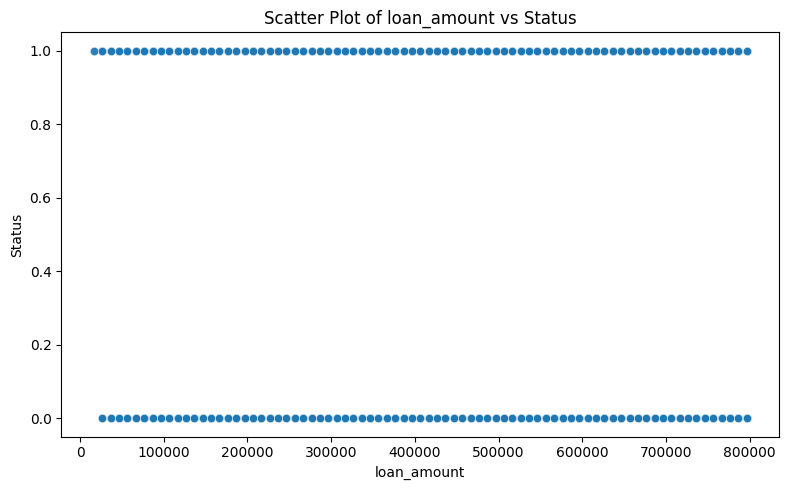

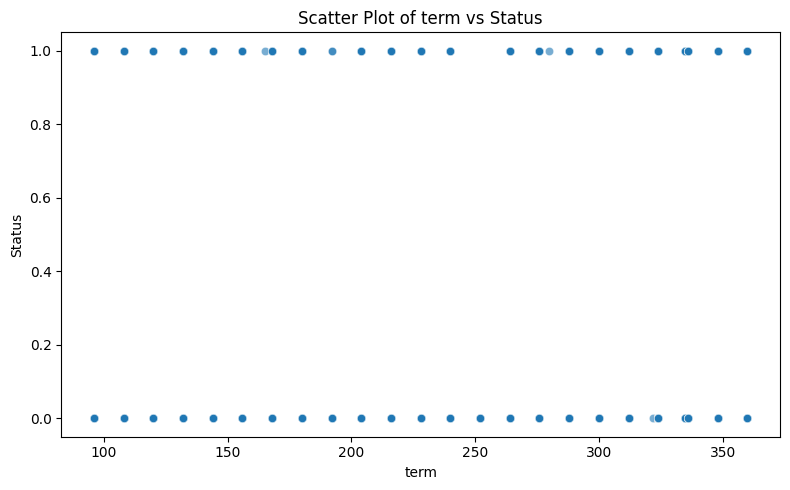

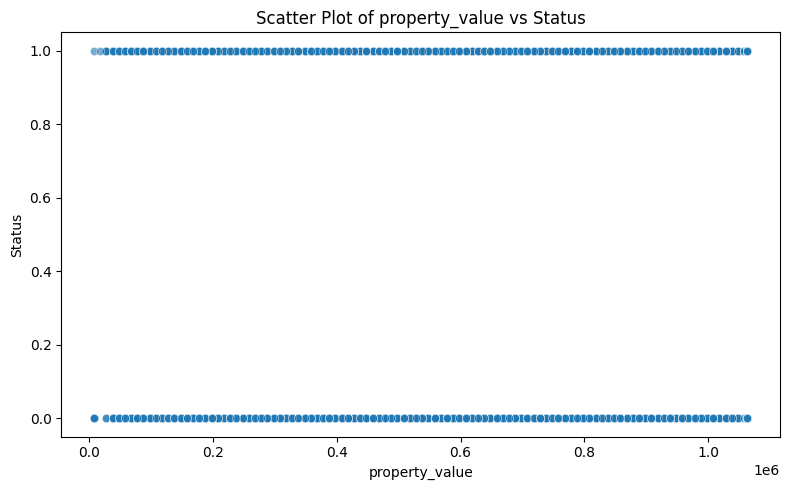

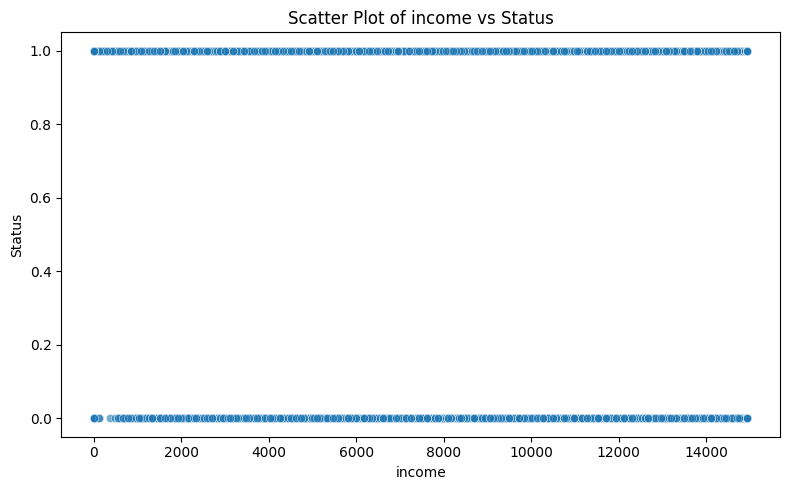

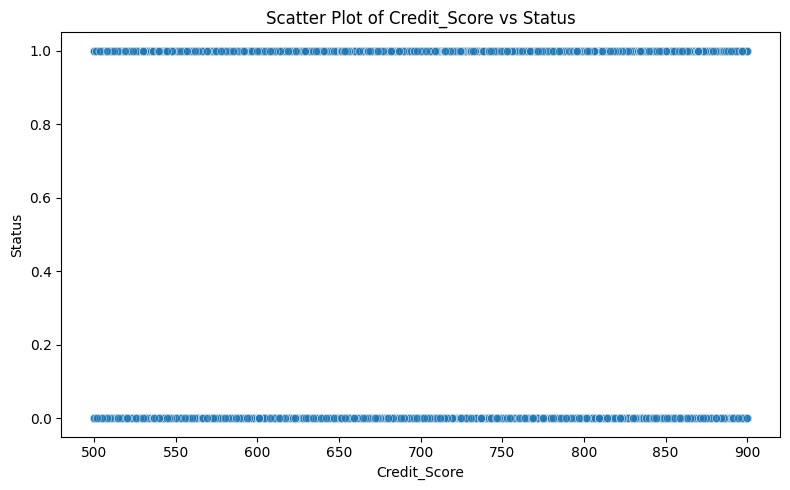

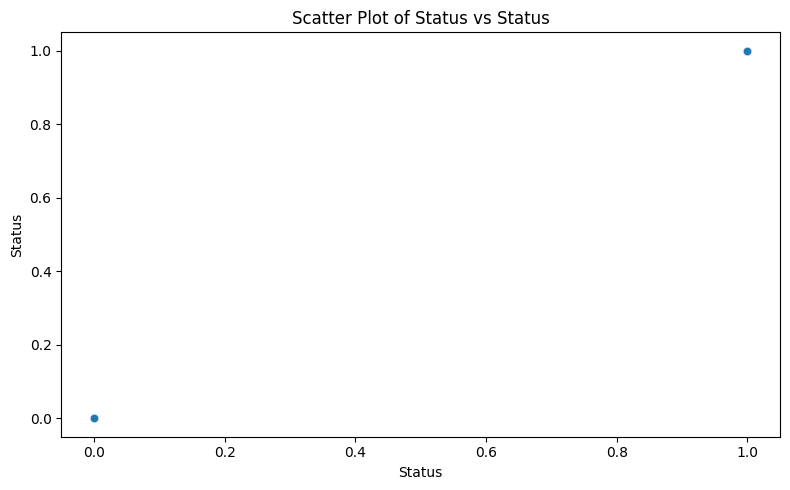

In [541]:


# Select numerical columns only
num_cols = df.select_dtypes(include='number').columns.tolist()

# Loop through each numerical column
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y='Status', alpha=0.6)
    plt.title(f'Scatter Plot of {col} vs Status')
    plt.xlabel(col)
    plt.ylabel('Status')
    plt.tight_layout()
    plt.show()

In [ ]:
#FROM THE VISUALISATION WE CAN SEE THERE ARE OUTLIERS WHICH ARE VERY FEW IN "loan_amount","property_value","income", which we
#will ignore for further analysis.

In [128]:
cat_cols=df.select_dtypes(include="object")
cat_cols

,Credit_Worthiness,Neg_ammortization,interest_only,lump_sum_payment,credit_type
0,l1,not_neg,not_int,not_lpsm,EXP
1,l1,not_neg,not_int,lpsm,EQUI
2,l1,neg_amm,not_int,not_lpsm,EXP
3,l1,not_neg,not_int,not_lpsm,EXP
4,l1,not_neg,not_int,not_lpsm,CRIF
...,...,...,...,...,...
148665,l1,not_neg,not_int,not_lpsm,CIB
148666,l1,not_neg,not_int,not_lpsm,CIB
148667,l1,not_neg,not_int,not_lpsm,CIB
148668,l1,not_neg,not_int,not_lpsm,EXP


In [129]:
df1=df.drop(cat_cols,axis=1)
df1

,loan_amount,term,property_value,income,Credit_Score,Status
0,116500,360,118000.000000,1740.0,758,1
1,206500,360,497893.465696,4980.0,552,1
2,406500,360,508000.000000,9480.0,834,0
3,456500,360,658000.000000,11880.0,587,0
4,696500,360,758000.000000,10440.0,602,0
...,...,...,...,...,...,...
148665,436500,180,608000.000000,7860.0,659,0
148666,586500,360,788000.000000,7140.0,569,0
148667,446500,180,728000.000000,6900.0,702,0
148668,196500,180,278000.000000,7140.0,737,0


<Axes: >

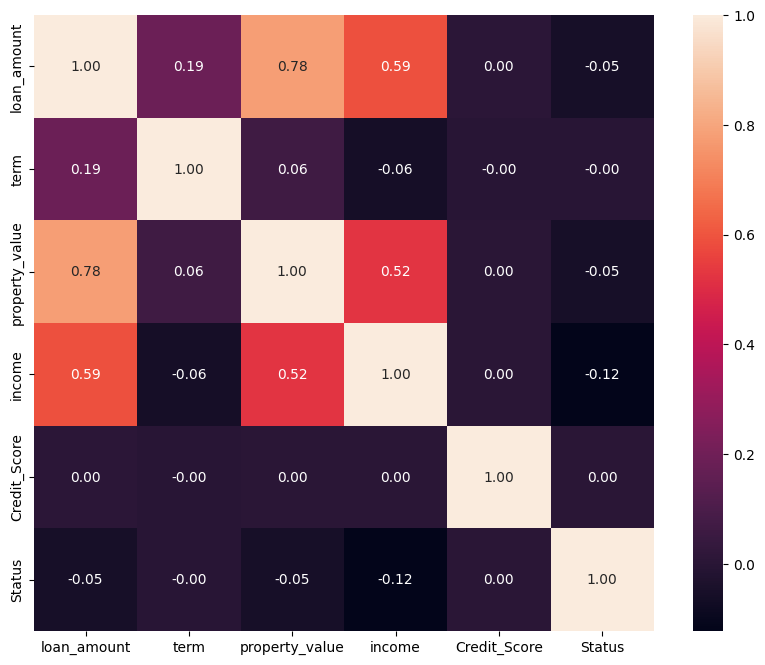

In [130]:
#STEP-5:COLLINEARITY
corre=df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corre,fmt=".2f",annot=True)

In [ ]:
#WE CAN SEE THAT COLUMNS LIKE "credit_Score" HAVE ZERO CORRELATION WITH Status.
#some COLUMNS ARE NEGATIVELY CORRELATED AND SOME ARE MINORLY POSITIVELY RELATED WITH Status.
#ALSO MULTICOLLINEARITY IS PRESENT i.e. TWO COLUMNS "property_value","loan_amount" ARE (>70%) DEPENDENT ON EACH OTHER. SO WE WILL DROP ONE 
#AND KEEP THE OTHER.
#WE HAVE TO USE OTHER FEATURE SELECTION TECHNIQUES FOR OTHER COLUMN TO FIND THE BEST FEATURE USING RFE(RECURSIVE FEATURE ELIMATION) OR OTHERS 
#IF NEEDED.

In [131]:
df.drop(["property_value"],axis=1,inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Credit_Worthiness  148670 non-null  object 
 1   loan_amount        148670 non-null  int64  
 2   term               148670 non-null  int64  
 3   Neg_ammortization  148670 non-null  object 
 4   interest_only      148670 non-null  object 
 5   lump_sum_payment   148670 non-null  object 
 6   income             148670 non-null  float64
 7   credit_type        148670 non-null  object 
 8   Credit_Score       148670 non-null  int64  
 9   Status             148670 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 11.3+ MB


In [133]:
#CREATING COLUMN TRANSFORMER 
x1=df.drop(["Status"],axis=1)
y1=df["Status"]

In [134]:
x1.columns

Index(['Credit_Worthiness', 'loan_amount', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'income', 'credit_type',
       'Credit_Score'],
      dtype='object')

In [135]:
num_features=x1.select_dtypes(exclude="object").columns
cat_features=x1.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder() #- Since LabelEncoder doesn't support X, y inputs like OneHotEncoder, StandardScaler, etc., the extra argument
# will triggers the error.


preprocessor=ColumnTransformer(
[
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",numeric_transformer,num_features),
]
)

In [136]:
x1=preprocessor.fit_transform(x1)
x1

array([[ 1.        ,  0.        ,  0.        , ...,  0.42573804,
        -1.35634259,  0.50235739],
       [ 1.        ,  0.        ,  0.        , ...,  0.42573804,
        -0.43842921, -1.27541323],
       [ 1.        ,  0.        ,  1.        , ...,  0.42573804,
         0.83645049,  1.15823392],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -2.6564098 ,
         0.10551946,  0.01907994],
       [ 1.        ,  0.        ,  0.        , ..., -2.6564098 ,
         0.17351305,  0.32112834],
       [ 1.        ,  0.        ,  0.        , ..., -1.62902719,
         0.20750984,  1.12371411]], shape=(148670, 16))

In [129]:
#STEP-6:SPLITTING THE DATA INTO TRAIN, VALI ,TEST 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # Or use RandomOverSampler
from collections import Counter

# Step 1: Split your data


X_train, X_temp, y_train, y_temp = train_test_split(x1, y1, test_size=0.3, stratify=y1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)



In [130]:
y1.unique()

array([1, 0])

In [131]:
#STEP-8:#APPLYING OVERSAMPLING TO BALANCE THE MINORTY CLASS
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Inspect the distribution
print("Before:", Counter(y_train))
print("After :", Counter(y_train_resampled))

Before: Counter({0: 78422, 1: 25647})
After : Counter({0: 78422, 1: 78422})


In [ ]:
#STEP-9: APPLYING MODELS WITHOUT RFE
#LOGISTIC REGREESION 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Use logistic regression for feature selection
lr = LogisticRegression(max_iter=1000, random_state=42)



In [141]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [145]:
from sklearn.metrics import confusion_matrix, classification_report

# On Training Data
y_pred_train = model.predict(X_train_resampled)
print("Training Classification Report of Logistic Regression:\n", classification_report(y_train_resampled, y_pred_train))
print("Training Confusion Matrix of Logistic Regression:\n", confusion_matrix(y_train_resampled, y_pred_train))

# On Validation Data
y_pred_val = model.predict(X_val)
print("Validation Classification Report of LOgistic Regression:\n", classification_report(y_val, y_pred_val))
val_cm = confusion_matrix(y_val, y_pred_val)
print("Validation Confusion Matrix of Logistic Regression:\n", val_cm)
#print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))



Training Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.69      0.91      0.79     78422
           1       0.87      0.60      0.71     78422

    accuracy                           0.75    156844
   macro avg       0.78      0.75      0.75    156844
weighted avg       0.78      0.75      0.75    156844

Training Confusion Matrix of Logistic Regression:
 [[71300  7122]
 [31454 46968]]
Validation Classification Report of LOgistic Regression:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     16804
           1       0.69      0.59      0.64      5496

    accuracy                           0.83     22300
   macro avg       0.78      0.75      0.76     22300
weighted avg       0.83      0.83      0.83     22300

Validation Confusion Matrix of Logistic Regression:
 [[15307  1497]
 [ 2237  3259]]


In [146]:
# On Test Data
y_pred_test = model.predict(X_test)
print("Test Classification Report of Logistic Regression:\n", classification_report(y_test, y_pred_test))
print("Test Confusion Matrix of Logistic Regression:\n", confusion_matrix(y_test, y_pred_test))

Test Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     16805
           1       0.69      0.60      0.64      5496

    accuracy                           0.83     22301
   macro avg       0.78      0.76      0.77     22301
weighted avg       0.83      0.83      0.83     22301

Test Confusion Matrix of Logistic Regression:
 [[15320  1485]
 [ 2201  3295]]


In [ ]:
# Class 0 (likely the negative class) performs very strongly across the board.
# High recall (0.91) suggests model is correctly identifying most of the class 0 instances.
# Precision is solid (0.87), meaning few false positives for class 0.
#Class 1 (likely the positive/minority class) lags in performance.
# Lower recall (0.60) means 40% of actual class 1 samples are missed.
#precision is moderate (0.69), which indicates a reasonable rate of true positives when class 1 is predicted.

#overall, the accuracy is respectable, but may be misleading due to class imbalance. Macro average offers a
#  clearer picture of per-class performance without favoring the majority.




In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate a basic decision tree
dt = DecisionTreeClassifier(random_state=42)

# Fit Decision Tree on selected features
dt.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_train_pred = dt.predict(X_train_resampled)
y_val_pred = dt.predict(X_val)
y_test_pred = dt.predict(X_test)

# Evaluate model
print("🔹 Train Classification Report of Decision tree:\n", classification_report(y_train_resampled, y_train_pred))
print("🔹 Train Confusion Matrix of Decision Tree\n", confusion_matrix(y_train_resampled, y_train_pred))

print("🔹 Validation Classification Report of Decision Tree:\n", classification_report(y_val, y_val_pred))
print("🔹 Validation Confusion Matrix of Decision Tree:\n", confusion_matrix(y_val, y_val_pred))



🔹 Train Classification Report of Decision tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78422
           1       1.00      1.00      1.00     78422

    accuracy                           1.00    156844
   macro avg       1.00      1.00      1.00    156844
weighted avg       1.00      1.00      1.00    156844

🔹 Train Confusion Matrix of Decision Tree
 [[78422     0]
 [   19 78403]]
🔹 Validation Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85     16804
           1       0.53      0.61      0.57      5496

    accuracy                           0.77     22300
   macro avg       0.70      0.72      0.71     22300
weighted avg       0.78      0.77      0.78     22300

🔹 Validation Confusion Matrix of Decision Tree:
 [[13883  2921]
 [ 2168  3328]]


In [148]:
print("🔹 Test Classification Report of Decision Tree:\n", classification_report(y_test, y_test_pred))
print("🔹 Test Confusion Matrix of Decision Tree:\n", confusion_matrix(y_test, y_test_pred))

🔹 Test Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85     16805
           1       0.54      0.61      0.57      5496

    accuracy                           0.78     22301
   macro avg       0.70      0.72      0.71     22301
weighted avg       0.79      0.78      0.78     22301

🔹 Test Confusion Matrix of Decision Tree:
 [[13943  2862]
 [ 2129  3367]]


In [ ]:
# Train set is perfectly memorized— case of overfitting.
# On validation/test, class 0 retains good performance but class 1 suffers significantly—precision stuck around 0.52–0.54, recall flat at 0.61.
# Macro F1 dips to 0.69–0.71, weaker than logistic regression.
# Accuracy is deceptively solid (0.78), but minority class misclassification is high.
# Validation and test results are nearly identical, meaning performance stabilizes—but at a lower level.

# So will Stick with logistic regression if  aiming for balance and generalization.


In [149]:
#TUNING THIS
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Pruned Decision Tree
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=6,            
    min_samples_split=10,    # Prevents overly specific splits
    min_samples_leaf=5       # Ensures leaves have enough samples
)


# Train the pruned model
dt.fit(X_train_resampled, y_train_resampled)

# Predictions
y_train_pred = dt.predict(X_train_resampled)
y_val_pred = dt.predict(X_val)
y_test_pred = dt.predict(X_test)

# Evaluation reports
print("🔹 Train Classification Report of Tuned Decision Tree:\n", classification_report(y_train_resampled, y_train_pred))
print("🔹 Train Confusion Matrix of Tuned Decision Tree:\n", confusion_matrix(y_train_resampled, y_train_pred))

print("🔹 Validation Classification Report of Tuned Decision Tree:\n", classification_report(y_val, y_val_pred))
print("🔹 Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))



🔹 Train Classification Report of Tuned Decision Tree:
               precision    recall  f1-score   support

           0       0.71      0.87      0.78     78422
           1       0.84      0.64      0.73     78422

    accuracy                           0.76    156844
   macro avg       0.77      0.76      0.75    156844
weighted avg       0.77      0.76      0.75    156844

🔹 Train Confusion Matrix of Tuned Decision Tree:
 [[68472  9950]
 [28013 50409]]
🔹 Validation Classification Report of Tuned Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     16804
           1       0.63      0.64      0.64      5496

    accuracy                           0.82     22300
   macro avg       0.76      0.76      0.76     22300
weighted avg       0.82      0.82      0.82     22300

🔹 Validation Confusion Matrix:
 [[14761  2043]
 [ 1980  3516]]


In [150]:
print("🔹 Test Classification Report of Tuned Decision Tree:\n", classification_report(y_test, y_test_pred))
print("🔹 Test Confusion Matrix of Tuned Decision Tree:\n", confusion_matrix(y_test, y_test_pred))

🔹 Test Classification Report of Tuned Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     16805
           1       0.63      0.64      0.64      5496

    accuracy                           0.82     22301
   macro avg       0.76      0.76      0.76     22301
weighted avg       0.82      0.82      0.82     22301

🔹 Test Confusion Matrix of Tuned Decision Tree:
 [[14761  2044]
 [ 1957  3539]]


In [ ]:
#The train set shows lower accuracy, which is a sign of controlled complexity—no overfitting.
# Validation and test results are near-identical, confirming excellent generalization.
# Class 1 maintains stable recall (~64%) but slightly lower precision than train, implying the tree avoids memorizing noise.


#Now upon comparing prunned Decision Tree and Logistic Regreesion-
# LR is Very consistent across train, validation, and test sets, Higher (69–71%) → Fewer false alarms, Plays well with regularization, threshold tuning.



In [151]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# Create a Random Forest classifier
rf_with = RandomForestClassifier(
    random_state=42,
    n_estimators=100,         # Number of trees
    max_depth=6,              # Controlled depth to reduce overfitting
    min_samples_split=10,     # Minimum samples to split an internal node
    min_samples_leaf=5        # Minimum samples at a leaf node
)



# Train the Random Forest
rf_with.fit(X_train_resampled, y_train_resampled)

# Predictions
y_train_pred = rf_with.predict(X_train_resampled)
y_val_pred = rf_with.predict(X_val)
y_test_pred = rf_with.predict(X_test)

# Evaluation
print("🔹 Train Classification Report of Random Forest:\n", classification_report(y_train_resampled, y_train_pred))
print("🔹 Train Confusion Matrix of Random Forest:\n", confusion_matrix(y_train_resampled, y_train_pred))

print("🔹 Validation Classification Report of Random Forest:\n", classification_report(y_val, y_val_pred))
print("🔹 Validation Confusion Matrix of Random Forest:\n", confusion_matrix(y_val, y_val_pred))



🔹 Train Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.69      0.93      0.79     78422
           1       0.90      0.59      0.71     78422

    accuracy                           0.76    156844
   macro avg       0.79      0.76      0.75    156844
weighted avg       0.79      0.76      0.75    156844

🔹 Train Confusion Matrix of Random Forest:
 [[73056  5366]
 [32435 45987]]
🔹 Validation Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     16804
           1       0.74      0.58      0.65      5496

    accuracy                           0.84     22300
   macro avg       0.80      0.75      0.77     22300
weighted avg       0.84      0.84      0.84     22300

🔹 Validation Confusion Matrix of Random Forest:
 [[15667  1137]
 [ 2330  3166]]


In [152]:
print("🔹 Test Classification Report of Random Forest:\n", classification_report(y_test, y_test_pred))
print("🔹 Test Confusion Matrix of Random Forest:\n", confusion_matrix(y_test, y_test_pred))

🔹 Test Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     16805
           1       0.74      0.58      0.65      5496

    accuracy                           0.85     22301
   macro avg       0.81      0.76      0.78     22301
weighted avg       0.84      0.85      0.84     22301

🔹 Test Confusion Matrix of Random Forest:
 [[15708  1097]
 [ 2307  3189]]


In [ ]:
#Train Set:
# High precision and recall for both classes.
# The class 1 recall of 72% is the highest seen so far.
#Minimal overfitting—accuracy is high, but not perfectly memorized like Decision Tree.
# Validation & Test Sets:
#Class 0 maintains top-tier recall at 93%, contributing to strong overall accuracy.
# Class 1 sees a slight drop in recall (59–58%), while precision remains solid (73–74%).
# Macro F1 ranges from 0.76 to 0.78, outperforming pruned Decision Tree and rivalling logistic regression.


In [ ]:
#Random Forest wins on overall accuracy, class 1 precision, and macro F1—even if class 1 recall dips slightly compared to pruned DT.
# It generalizes better than the original Decision Tree and improves over logistic regression for harder-to-detect class 1 samples.
# Slightly more complex than logistic regression, but worth if pipeline supports ensemble models.


In [155]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# Predictions
y_train_pred = xgb.predict(X_train_resampled)
y_val_pred = xgb.predict(X_val)
y_test_pred = xgb.predict(X_test)

# Evaluation
print("🔹 Train Classification Report of Xgboost:\n", classification_report(y_train_resampled, y_train_pred))
print("🔹 Train Confusion Matrix of Xgboost:\n", confusion_matrix(y_train_resampled, y_train_pred))

print("🔹 Validation Classification ReportXgboost of :\n", classification_report(y_val, y_val_pred))
print("🔹 Validation Confusion Matrix of Xgboost:\n", confusion_matrix(y_val, y_val_pred))



🔹 Train Classification Report of Xgboost:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88     78422
           1       0.96      0.76      0.85     78422

    accuracy                           0.86    156844
   macro avg       0.88      0.86      0.86    156844
weighted avg       0.88      0.86      0.86    156844

🔹 Train Confusion Matrix of Xgboost:
 [[75786  2636]
 [18628 59794]]
🔹 Validation Classification ReportXgboost of :
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     16804
           1       0.83      0.57      0.67      5496

    accuracy                           0.86     22300
   macro avg       0.85      0.76      0.79     22300
weighted avg       0.86      0.86      0.85     22300

🔹 Validation Confusion Matrix of Xgboost:
 [[16148   656]
 [ 2384  3112]]


In [156]:
print("🔹 Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("🔹 Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

🔹 Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     16805
           1       0.83      0.57      0.67      5496

    accuracy                           0.86     22301
   macro avg       0.85      0.76      0.79     22301
weighted avg       0.86      0.86      0.85     22301

🔹 Test Confusion Matrix:
 [[16154   651]
 [ 2385  3111]]


In [ ]:
#TTrain set
#Extremely high recall for both classes—especially class 0 at 97%.# Class 1 precision hits an impressive 96%, suggesting the model was confident and accurate in minority class predictions.
#Recall for class 1 at 76% shows strong coverage.
# Slight signs of overfitting, but not extreme due to accuracy being 86%, not perfect.
#Validation & Test Sets:
#Class 0 continues to dominate with 96% recall, which boosts overall accuracy.
#Class 1 shows very strong precision (83%), but recall drops to 57%, meaning many actual positives are missed.
# Macro F1 at 0.79, weighted F1 around 0.85 in test—best of all models so far.

#XGBoost dominates in precision, macro F1, and accuracy, but sacrifices some recall for class 1.

#SO finally i have choose Xgboost as my final model selection and since the dataset is originally imbalance oversampling will not give that
#advance result so Xgboost is my final choice and feature selection will reduce the features more and the model will not get enough 
#inputs to learn and understand so not employing feature-selection technique.

In [ ]:
import joblib


# Save your model
joblib.dump(xgb_with, 'XGBOOST_SANGHAMITRA_PIPELINE.pkl')

# Save your scaler
joblib.dump(scaler, 'XGBOOST_SCALER_PIPELINE.pkl')


['XGBOOST_SCALER_PIPELINE.pkl']

In [ ]:
# Load saved model and scaler
loaded_model = joblib.load('XGBOOST_SANGHAMITRA_PIPELINE.pkl')
loaded_scaler = joblib.load('XGBOOST_SCALER_PIPELINE.pkl')

# Predict with them to confirm
X_val_scaled = scaler.transform(X_val_selected)
predictions =xgb_with.predict(X_val_scaled)
predictions

C:\Users\trigo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0, 1, 0, ..., 0, 1, 0])